In [7]:
from cropnet.data_downloader import DataDownloader
import os
from herbie import Herbie
from datetime import datetime

# Use the "target_dir" to specify where the data should be downloaded to
downloader = DataDownloader(target_dir="./data")

# Download 2022 USDA Soybean data
# Note that most of the 2023 USDA data are not yet available
downloader.download_USDA("Soybean", fips_codes=["10003", "22007"], years=["2022"])

# Download the 2023 (the 1st and 2nd quarters) Sentinel-2 Imagery
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="AG")
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="NDVI")


# --- CONFIG ---
fips_codes = {
    "10003": "DE",  # Delaware - New Castle
    "22007": "LA",  # Louisiana - Assumption
}
date = "2023-01-01"
forecast_hour = "f00"  # Initial forecast only

# --- MAIN ---
for fips, state in fips_codes.items():
    output_dir = f"data/HRRR/realtime_wrf/2023/20230101"

    # Forecast times: 00 UTC to 23 UTC
    for hour in range(24):
        run_time = datetime.strptime(f"{date} {hour:02d}", "%Y-%m-%d %H")

        # Initialize Herbie
        H = Herbie(
            date=run_time,
            model="hrrr",
            product="sfc",
            fxx=0,  # f00 forecast
            save_dir=output_dir,
            verbose=True,
        )

        # Define output filename
        filename = f"hrrr.{date.replace('-', '')}.{hour:02d}.00.grib2"
        file_path = os.path.join(output_dir, filename)

        # Skip if file exists
        if os.path.exists(file_path):
            print(f"✅ File exists, skipping: {file_path}")
            continue

        # Download the file
        try:
            # Download and get the original file path
            downloaded_file = H.download()

            if downloaded_file and os.path.exists(downloaded_file):
                final_path = os.path.join(output_dir, f"hrrr.{run_time:%Y%m%d}.{run_time:%H}.00.grib2")
                os.rename(downloaded_file, final_path)
                print(f"✅ Renamed: {downloaded_file} -> {final_path}")
            else:
                print(f"⚠️ File not found after download: {downloaded_file}")
        except Exception as e:
            print(f"❌ Failed at {file_path}: {e}")



Progress: [ 1/1 ], Downloading USDA Data, Year: 2022, Crop: Soybean
Year Progress: [1 / 1], Downloading 2023's AG Imagery for the county 10003


dates processed: 100%|██████████| 6/6 [00:00<00:00, 11.81it/s]


Year Progress: [1 / 1], Downloading 2023's AG Imagery for the county 22007


dates processed: 100%|██████████| 6/6 [00:00<00:00, 12.00it/s]


Year Progress: [1 / 1], Downloading 2023's NDVI Imagery for the county 10003


dates processed: 100%|██████████| 6/6 [00:00<00:00, 11.92it/s]


Year Progress: [1 / 1], Downloading 2023's NDVI Imagery for the county 22007


dates processed: 100%|██████████| 6/6 [00:00<00:00, 11.90it/s]


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: data/HRRR/realtime_wrf/2023/20230101/hrrr.20230101.00.00.grib2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: data/HRRR/realtime_wrf/2023/20230101/hrrr.20230101.01.00.grib2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 02:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: data/HRRR/realtime_wrf/2023/20230101/hrrr.20230101.02.00.grib2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: data/HRRR/realtime_wrf/2023/20230101/hrrr.20230101.03.00.grib2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: data/HRRR/realtime_wrf/2023/20230101/hrrr.20230101.04.00.grib2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-01 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ File exists, skipping: d

In [9]:
# Use the "base_fir" to specify where the CropNet data is stored
retriever = DataRetriever(base_dir="/mnt/data/CropNet")
   
# Retrieve the 2022 USDA Soybean data
usda_data = retriever.retrieve_USDA(crop_type="Soybean", fips_codes=["10003", "22007"], years=["2022"])
   
# Retrieve the 2022 Sentinel-2 Imagery data
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="AG")
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="NDVI")
   
# Retrieve the 2022 WRF-HRRR data
hrrr_data = retriever.retrieve_HRRR(fips_codes=["10003","22007"], years=["2022"])

NameError: name 'DataRetriever' is not defined

In [131]:
import pandas as pd

# Read the USDA Corn County 2022 data
usda_corn_path = '/Users/RavenMott1/Downloads/Cropnet/data/USDA Crop Dataset/data/Corn/2022/USDA_Corn_County_2022.csv'
usda_corn_df = pd.read_csv(usda_corn_path)

# Read the HRRR computed data for AL, March 2022
hrrr_march_path = '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 7/data/2022/AL/HRRR_01_AL_2022-03.csv'
hrrr_march_df = pd.read_csv(hrrr_march_path)

In [132]:
usda_corn_df.head()


commodity_desc reference_period_desc  year  state_ansi state_name  \
0           CORN                  YEAR  2022           1    ALABAMA   
1           CORN                  YEAR  2022           1    ALABAMA   
2           CORN                  YEAR  2022           1    ALABAMA   
3           CORN                  YEAR  2022           1    ALABAMA   
4           CORN                  YEAR  2022           1    ALABAMA   

   county_ansi county_name  asd_code                     asd_desc domain_desc  \
0            3     BALDWIN        50  COASTAL PLAINS & GULF COAST       TOTAL   
1            5     BARBOUR        60                    WIREGRASS       TOTAL   
2            9      BLOUNT        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
3           15     CALHOUN        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
4           19    CHEROKEE        20   MOUNTAINS & EASTERN VALLEY       TOTAL   

  source_desc agg_level_desc  PRODUCTION, MEASURED IN BU  \
0      SURVEY         COUNTY                   1020000.0   
1      SURVEY         COUNTY                    262000.0   
2      SURVEY         COUNTY                    242000.0   
3      SURVEY         COUNTY                    319000.0   
4      SURVEY         COUNTY                    633000.0   

   YIELD, MEASURED IN BU / ACRE  
0                         139.0  
1                         159.8  
2                         100.4  
3                         142.4  
4                         138.5

In [133]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year  state_ansi state_name  \
1511           CORN                  YEAR  2022          55  WISCONSIN   
1512           CORN                  YEAR  2022          55  WISCONSIN   
1513           CORN                  YEAR  2022          55  WISCONSIN   
1514           CORN                  YEAR  2022          55  WISCONSIN   
1515           CORN                  YEAR  2022          55  WISCONSIN   

      county_ansi county_name  asd_code      asd_desc domain_desc source_desc  \
1511          133    WAUKESHA        90     SOUTHEAST       TOTAL      SURVEY   
1512          135     WAUPACA        50       CENTRAL       TOTAL      SURVEY   
1513          137    WAUSHARA        50       CENTRAL       TOTAL      SURVEY   
1514          139   WINNEBAGO        60  EAST CENTRAL       TOTAL      SURVEY   
1515          141        WOOD        50       CENTRAL       TOTAL      SURVEY   

     agg_level_desc  PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE  
1511         COUNTY                   3493000.0                         181.0  
1512         COUNTY                   6588000.0                         175.2  
1513         COUNTY                   5800000.0                         174.7  
1514         COUNTY                   5862000.0                         171.9  
1515         COUNTY                   4312000.0                         167.8

In [134]:
hrrr_march_df.head()


Year  Month  Day Daily/Monthly    State   County  FIPS Code  Grid Index  \
0  2022      3  1.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
1  2022      3  2.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
2  2022      3  3.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
3  2022      3  4.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
4  2022      3  5.0         Daily  ALABAMA  AUTAUGA       1001         0.0   

   Lat (llcrnr)  Lon (llcrnr)  ...  Max Temperature (K)  Min Temperature (K)  \
0     32.340803    -86.917595  ...              294.298              274.949   
1     32.340803    -86.917595  ...              298.036              273.700   
2     32.340803    -86.917595  ...              298.460              275.565   
3     32.340803    -86.917595  ...              301.517              276.623   
4     32.340803    -86.917595  ...              301.180              281.089   

   Precipitation (kg m**-2)  Relative Humidity (%)  Wind Gust (m s**-1)  \
0                       0.0                   54.8                2.544   
1                       0.0                   55.8                1.832   
2                       0.0                   55.7                2.034   
3                       0.0                   50.2                2.460   
4                       0.0                   52.4                5.587   

   Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
0                 4.196                          0.270   
1                 2.132                          1.848   
2                 2.748                          2.565   
3                 2.383                          0.238   
4                 6.994                         -1.547   

   V Component of Wind (m s**-1)  Downward Shortwave Radiation Flux (W m**-2)  \
0                         -3.479                                       5848.2   
1                         -0.676                                       5893.6   
2                          0.303                                       5891.3   
3                         -0.048                                       5915.7   
4                          6.306                                       5592.2   

   Vapor Pressure Deficit (kPa)  
0                         0.779  
1                         0.933  
2                         1.000  
3                         1.228  
4                         1.147  

[5 rows x 23 columns]

In [135]:
hrrr_march_df.tail()
print("Unique counties:", hrrr_march_df["County"].unique())
print("Number of unique counties:", hrrr_march_df["County"].nunique())

Unique counties: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'SHELBY' 'ST. CLAIR' 'SUMTER' 'TALLADEGA' 'TALLAPOOSA' 'TUSCALOOSA'
 'WALKER' 'WASHINGTON' 'WILCOX' 'WINSTON']
Number of unique counties: 67


In [136]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_march_df shape:", hrrr_march_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_march_df data types:\n", hrrr_march_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_march_df missing values:\n", hrrr_march_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_df categorical columns:", hrrr_march_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_df numerical columns:", hrrr_march_df.select_dtypes(include=['number']).columns.tolist())


usda_corn_df shape: (1516, 14)
hrrr_march_df shape: (48799, 23)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_ansi                        int64
state_name                       object
county_ansi                       int64
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
dtype: object

hrrr_march_df data types:
 Year                                             int64
Month                                            int64
Day                                            float64
Daily/Monthly                                   object
State                                           object
County                          

In [ ]:
# Data Cleaning and Standardization
# --- 1. Filter for Alabama ---
usda_corn_df = usda_corn_df[usda_corn_df["state_name"].str.upper() == "ALABAMA"]

# --- 2. Standardize county/state names (uppercase, no extra spaces) ---
def standardize_location_names(df, county_col="County", state_col="State"):
    if county_col in df.columns:
        df[county_col] = df[county_col].astype(str).str.strip().str.upper()
    if state_col in df.columns:
        df[state_col] = df[state_col].astype(str).str.strip().str.upper()
    return df

usda_corn_df = standardize_location_names(usda_corn_df, county_col="county_name", state_col="state_name")
hrrr_march_df = standardize_location_names(hrrr_march_df, county_col="County", state_col="State")

# --- 3. Convert temperature values from Kelvin to Celsius ---
temp_k_map = {
    "Avg Temperature (K)": "Avg Temperature (C)",
    "Max Temperature (K)": "Max Temperature (C)",
    "Min Temperature (K)": "Min Temperature (C)"
}
for k_col, c_col in temp_k_map.items():
    if k_col in hrrr_march_df.columns:
        hrrr_march_df[c_col] = hrrr_march_df[k_col] - 273.15
        # Optionally remove the original Kelvin column
        del hrrr_march_df[k_col]

# --- 4. Split daily and monthly data into separate DataFrames ---
# Identify rows where "Daily/Monthly" is "Monthly"
is_monthly = hrrr_march_df["Daily/Monthly"].str.upper() == "MONTHLY"
# Create a new DataFrame for monthly data
hrrr_march_monthly_df = hrrr_march_df[is_monthly].reset_index(drop=True)
# Remove monthly rows from the original DataFrame (keep only daily)
hrrr_march_df = hrrr_march_df[~is_monthly].reset_index(drop=True)

# Remove the "Daily/Monthly" column from both DataFrames if present
for df in [hrrr_march_df, hrrr_march_monthly_df]:
    if "Daily/Monthly" in df.columns:
        del df["Daily/Monthly"]

# Add "date" column for daily data if year, month, day columns exist
if all(col in hrrr_march_df.columns for col in ["Year", "Month", "Day"]):
    hrrr_march_df["Date"] = pd.to_datetime(hrrr_march_df[["Year", "Month", "Day"]], errors="coerce")

# Add "date" column for monthly data if year and month columns exist
if all(col in hrrr_march_monthly_df.columns for col in ["Year", "Month"]):
    # Assign day=1 for all rows to allow conversion to datetime
    hrrr_march_monthly_df["Date"] = pd.to_datetime(
        dict(
            year=hrrr_march_monthly_df["Year"],
            month=hrrr_march_monthly_df["Month"],
            day=1
        ),
        errors="coerce"
    )

# Fips column for usda_corn_df using state_ansi and county_ansi
usda_corn_df["FIPS"] = usda_corn_df["state_ansi"].astype(str).str.zfill(2) + usda_corn_df["county_ansi"].astype(str).str.zfill(3)
# Standardize FIPS codes in HRRR data to match USDA (5-digit, zero-padded string)
for df in [hrrr_march_df, hrrr_march_monthly_df]:
    if "FIPS Code" in df.columns:
        df["FIPS"] = df["FIPS Code"].astype(int).astype(str).str.zfill(5)

# --- 5. Remove unnecessary columns ---
remove_cols = ["Lat (llcrnr)", "Lon (llcrnr)", "Lat (urcrnr)", "Lon (urcrnr)","Year", "Month", "Day", "Daily/Monthly", "state_ansi", "county_ansi", "FIPS Code"]
for df in [hrrr_march_df, hrrr_march_monthly_df, usda_corn_df]:
    for col in remove_cols:
        if col in df.columns:
            del df[col]

 


In [138]:
usda_corn_df.head()

commodity_desc reference_period_desc  year state_name county_name  asd_code  \
0           CORN                  YEAR  2022    ALABAMA     BALDWIN        50   
1           CORN                  YEAR  2022    ALABAMA     BARBOUR        60   
2           CORN                  YEAR  2022    ALABAMA      BLOUNT        20   
3           CORN                  YEAR  2022    ALABAMA     CALHOUN        20   
4           CORN                  YEAR  2022    ALABAMA    CHEROKEE        20   

                      asd_desc domain_desc source_desc agg_level_desc  \
0  COASTAL PLAINS & GULF COAST       TOTAL      SURVEY         COUNTY   
1                    WIREGRASS       TOTAL      SURVEY         COUNTY   
2   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
3   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
4   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   

   PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
0                   1020000.0                         139.0  01003  
1                    262000.0                         159.8  01005  
2                    242000.0                         100.4  01009  
3                    319000.0                         142.4  01015  
4                    633000.0                         138.5  01019

In [139]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year state_name county_name  \
27           CORN                  YEAR  2022    ALABAMA       PERRY   
28           CORN                  YEAR  2022    ALABAMA    RANDOLPH   
29           CORN                  YEAR  2022    ALABAMA     RUSSELL   
30           CORN                  YEAR  2022    ALABAMA   TALLADEGA   
31           CORN                  YEAR  2022    ALABAMA  TUSCALOOSA   

    asd_code                 asd_desc domain_desc source_desc agg_level_desc  \
27        40               BLACK BELT       TOTAL      SURVEY         COUNTY   
28        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
29        60                WIREGRASS       TOTAL      SURVEY         COUNTY   
30        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
31        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   

    PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
27                    434000.0                          68.0  01105  
28                    131500.0                         139.9  01111  
29                     60500.0                          99.2  01113  
30                    824000.0                         154.9  01121  
31                    256000.0                         120.8  01125

In [140]:
hrrr_march_df.head()

State   County  Grid Index  Precipitation (kg m**-2)  \
0  ALABAMA  AUTAUGA         0.0                       0.0   
1  ALABAMA  AUTAUGA         0.0                       0.0   
2  ALABAMA  AUTAUGA         0.0                       0.0   
3  ALABAMA  AUTAUGA         0.0                       0.0   
4  ALABAMA  AUTAUGA         0.0                       0.0   

   Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
0                   54.8                2.544                 4.196   
1                   55.8                1.832                 2.132   
2                   55.7                2.034                 2.748   
3                   50.2                2.460                 2.383   
4                   52.4                5.587                 6.994   

   U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
0                          0.270                         -3.479   
1                          1.848                         -0.676   
2                          2.565                          0.303   
3                          0.238                         -0.048   
4                         -1.547                          6.306   

   Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
0                                       5848.2                         0.779   
1                                       5893.6                         0.933   
2                                       5891.3                         1.000   
3                                       5915.7                         1.228   
4                                       5592.2                         1.147   

   Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)       Date  \
0               10.569               21.148                1.799 2022-03-01   
1               11.695               24.886                0.550 2022-03-02   
2               13.443               25.310                2.415 2022-03-03   
3               14.797               28.367                3.473 2022-03-04   
4               17.573               28.030                7.939 2022-03-05   

    FIPS  
0  01001  
1  01001  
2  01001  
3  01001  
4  01001

In [141]:
hrrr_march_df.tail()

State   County  Grid Index  Precipitation (kg m**-2)  \
48727  ALABAMA  WINSTON         9.0                     0.000   
48728  ALABAMA  WINSTON         9.0                     0.000   
48729  ALABAMA  WINSTON         9.0                     0.000   
48730  ALABAMA  WINSTON         9.0                     0.002   
48731  ALABAMA  WINSTON         9.0                    27.281   

       Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
48727                   39.1                5.710                 2.099   
48728                   43.8                3.581                 1.699   
48729                   53.3                6.053                 2.645   
48730                   48.5                0.000                 2.804   
48731                   48.5                0.000                 2.804   

       U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
48727                          0.621                         -1.765   
48728                         -0.587                         -1.522   
48729                         -1.147                          1.536   
48730                         -1.462                          2.393   
48731                         -1.462                          2.393   

       Downward Shortwave Radiation Flux (W m**-2)  \
48727                                       6501.2   
48728                                       6638.7   
48729                                       4909.0   
48730                                          0.0   
48731                                          0.0   

       Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
48727                         0.828               10.669               15.430   
48728                         0.794               10.823               17.804   
48729                         0.769               14.571               22.464   
48730                         1.623               24.917               24.917   
48731                         1.623               24.917               24.917   

       Min Temperature (C)       Date   FIPS  
48727                5.223 2022-03-27  01133  
48728                6.222 2022-03-28  01133  
48729                8.972 2022-03-29  01133  
48730               24.917 2022-03-30  01133  
48731               24.917 2022-03-31  01133

In [142]:
hrrr_march_monthly_df.head()

State   County  Grid Index  Precipitation (kg m**-2)  \
0  ALABAMA  AUTAUGA         NaN                  4.730467   
1  ALABAMA  BALDWIN         NaN                  3.919067   
2  ALABAMA  BARBOUR         NaN                  3.019852   
3  ALABAMA     BIBB         NaN                  4.967143   
4  ALABAMA   BLOUNT         NaN                  3.895668   

   Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
0              62.905376             4.960576              3.720396   
1              69.308144             5.725576              5.751650   
2              60.154946             5.039943              3.582814   
3              61.184879             5.001548              3.175573   
4              58.712673             5.427668              2.653696   

   U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
0                       0.014176                       0.117413   
1                      -0.252672                       0.574675   
2                      -0.070287                       0.610496   
3                      -0.012167                       0.385006   
4                       0.108697                       0.478872   

   Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
0                                  4399.470763                      0.740146   
1                                  4522.423198                      0.656712   
2                                  4339.928828                      0.854217   
3                                  4427.879540                      0.751315   
4                                  4364.632276                      0.733415   

   Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)       Date  \
0            14.638802            21.620277             8.972987 2022-03-01   
1            16.639567            22.607529            11.504233 2022-03-01   
2            15.978806            23.243090             9.819511 2022-03-01   
3            14.307363            21.467675             8.719986 2022-03-01   
4            13.121425            19.909270             7.878968 2022-03-01   

    FIPS  
0  01001  
1  01003  
2  01005  
3  01007  
4  01009

In [143]:
hrrr_march_monthly_df.tail()

State      County  Grid Index  Precipitation (kg m**-2)  \
62  ALABAMA  TUSCALOOSA         NaN                  3.876492   
63  ALABAMA      WALKER         NaN                  4.471177   
64  ALABAMA  WASHINGTON         NaN                  4.379315   
65  ALABAMA      WILCOX         NaN                  4.491034   
66  ALABAMA     WINSTON         NaN                  4.835881   

    Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
62              59.495776             5.155607              3.558309   
63              60.890092             5.136324              2.846570   
64              63.770634             5.341186              5.059961   
65              61.483455             4.969465              4.544999   
66              62.832258             5.573339              2.467787   

    U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
62                       0.057709                       0.554891   
63                       0.025378                       0.561467   
64                       0.143978                      -0.015529   
65                       0.396532                       0.384566   
66                       0.068394                       0.453745   

    Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
62                                  4486.816263                      0.777955   
63                                  4404.396332                      0.726105   
64                                  4515.201850                      0.772841   
65                                  4559.145533                      0.811691   
66                                  4368.483452                      0.650171   

    Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)       Date  \
62            14.160839            21.449131             8.483147 2022-03-01   
63            13.539470            20.642082             8.086236 2022-03-01   
64            15.677741            23.215106             9.478488 2022-03-01   
65            15.218041            22.885998             8.737556 2022-03-01   
66            12.674177            19.499974             7.485458 2022-03-01   

     FIPS  
62  01125  
63  01127  
64  01129  
65  01131  
66  01133

In [144]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_march_df shape:", hrrr_march_df.shape)
print("hrrr_march_monthly_df shape:", hrrr_march_monthly_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_march_df data types:\n", hrrr_march_df.dtypes)
print("\nhrrr_march_monthly_df data types:\n", hrrr_march_monthly_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_march_df missing values:\n", hrrr_march_df.isnull().sum())
print("\nhrrr_march_monthly_df missing values:\n", hrrr_march_monthly_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_df categorical columns:", hrrr_march_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_df numerical columns:", hrrr_march_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_monthly_df categorical columns:", hrrr_march_monthly_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_monthly_df numerical columns:", hrrr_march_monthly_df.select_dtypes(include=['number']).columns.tolist())

usda_corn_df shape: (32, 13)
hrrr_march_df shape: (48732, 16)
hrrr_march_monthly_df shape: (67, 16)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_name                       object
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
FIPS                             object
dtype: object

hrrr_march_df data types:
 State                                                  object
County                                                 object
Grid Index                                            float64
Precipitation (kg m**-2)                              float64
Relative Humidity (%)                                 float64
W

In [145]:
print("Unique counties in usda_corn_df:", usda_corn_df["county_name"].unique())
print("Number of unique counties in usda_corn_df:", usda_corn_df["county_name"].nunique())

print("\nUnique counties in hrrr_march_df:", hrrr_march_df["County"].unique())
print("Number of unique counties in hrrr_march_df:", hrrr_march_df["County"].nunique())

print("\nUnique counties in hrrr_march_monthly_df:", hrrr_march_monthly_df["County"].unique())
print("Number of unique counties in hrrr_march_monthly_df:", hrrr_march_monthly_df["County"].nunique())

print("\nAll unique FIPS codes in hrrr_march_df and corresponding counties:")
fips_county = hrrr_march_df.drop_duplicates("FIPS")[["FIPS", "County"]]
for _, row in fips_county.iterrows():
    print(f"{row['FIPS']}: {row['County']}")
print("Number of unique FIPS codes in hrrr_march_df:", hrrr_march_df["FIPS"].nunique())

Unique counties in usda_corn_df: ['BALDWIN' 'BARBOUR' 'BLOUNT' 'CALHOUN' 'CHEROKEE' 'CHILTON' 'COFFEE'
 'COLBERT' 'CULLMAN' 'DALE' 'DALLAS' 'DE KALB' 'ESCAMBIA' 'ETOWAH'
 'FAYETTE' 'HENRY' 'HOUSTON' 'JACKSON' 'LAUDERDALE' 'LAWRENCE' 'LIMESTONE'
 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MONROE' 'MORGAN' 'PERRY'
 'RANDOLPH' 'RUSSELL' 'TALLADEGA' 'TUSCALOOSA']
Number of unique counties in usda_corn_df: 32

Unique counties in hrrr_march_df: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'S

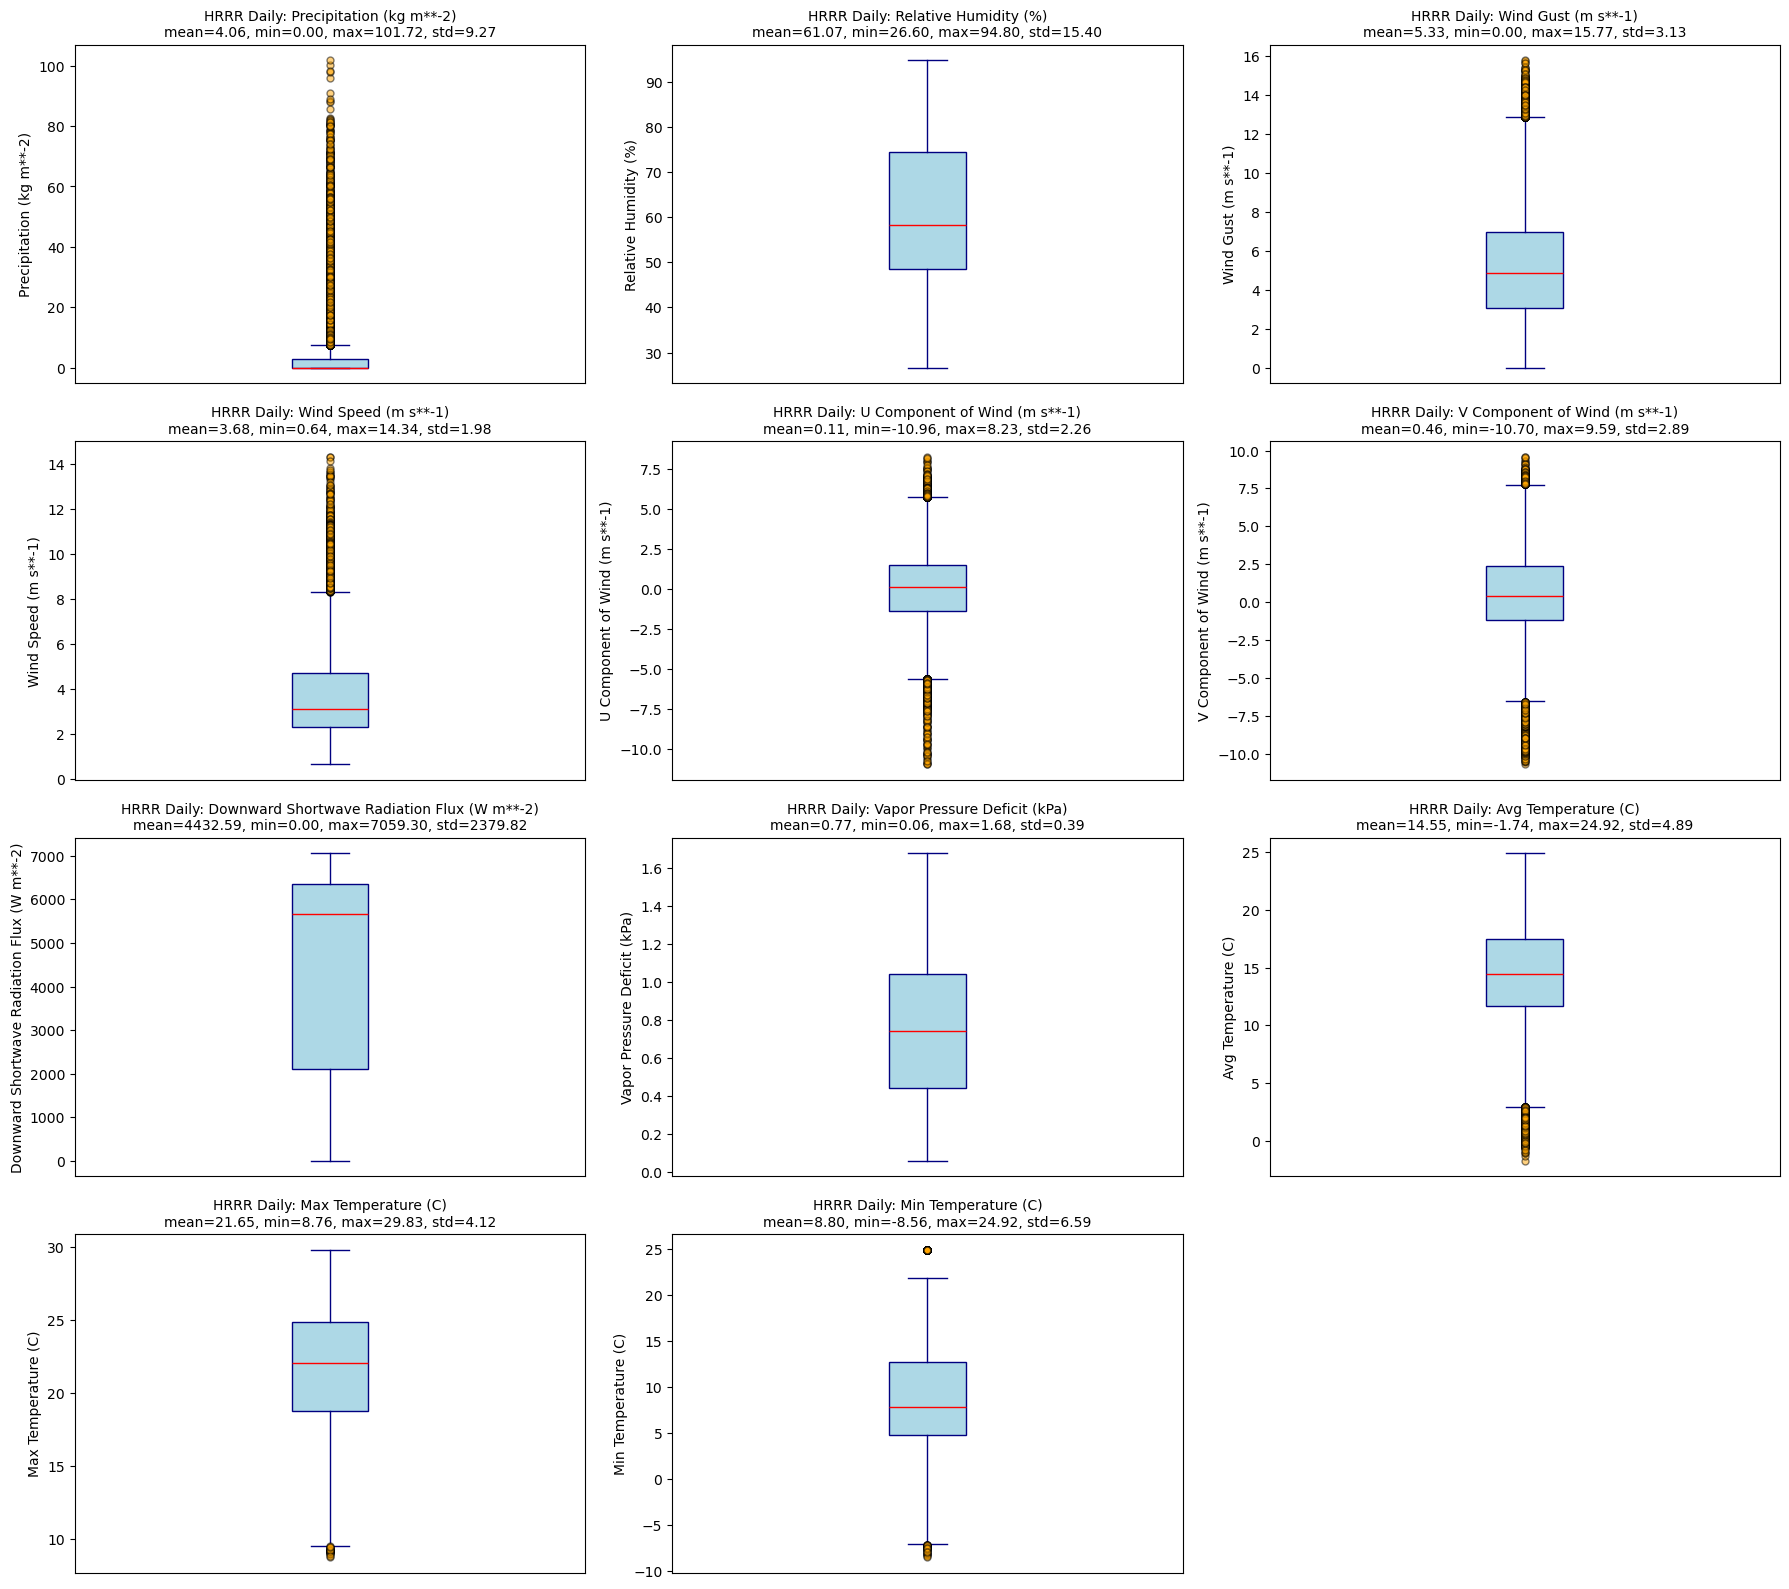

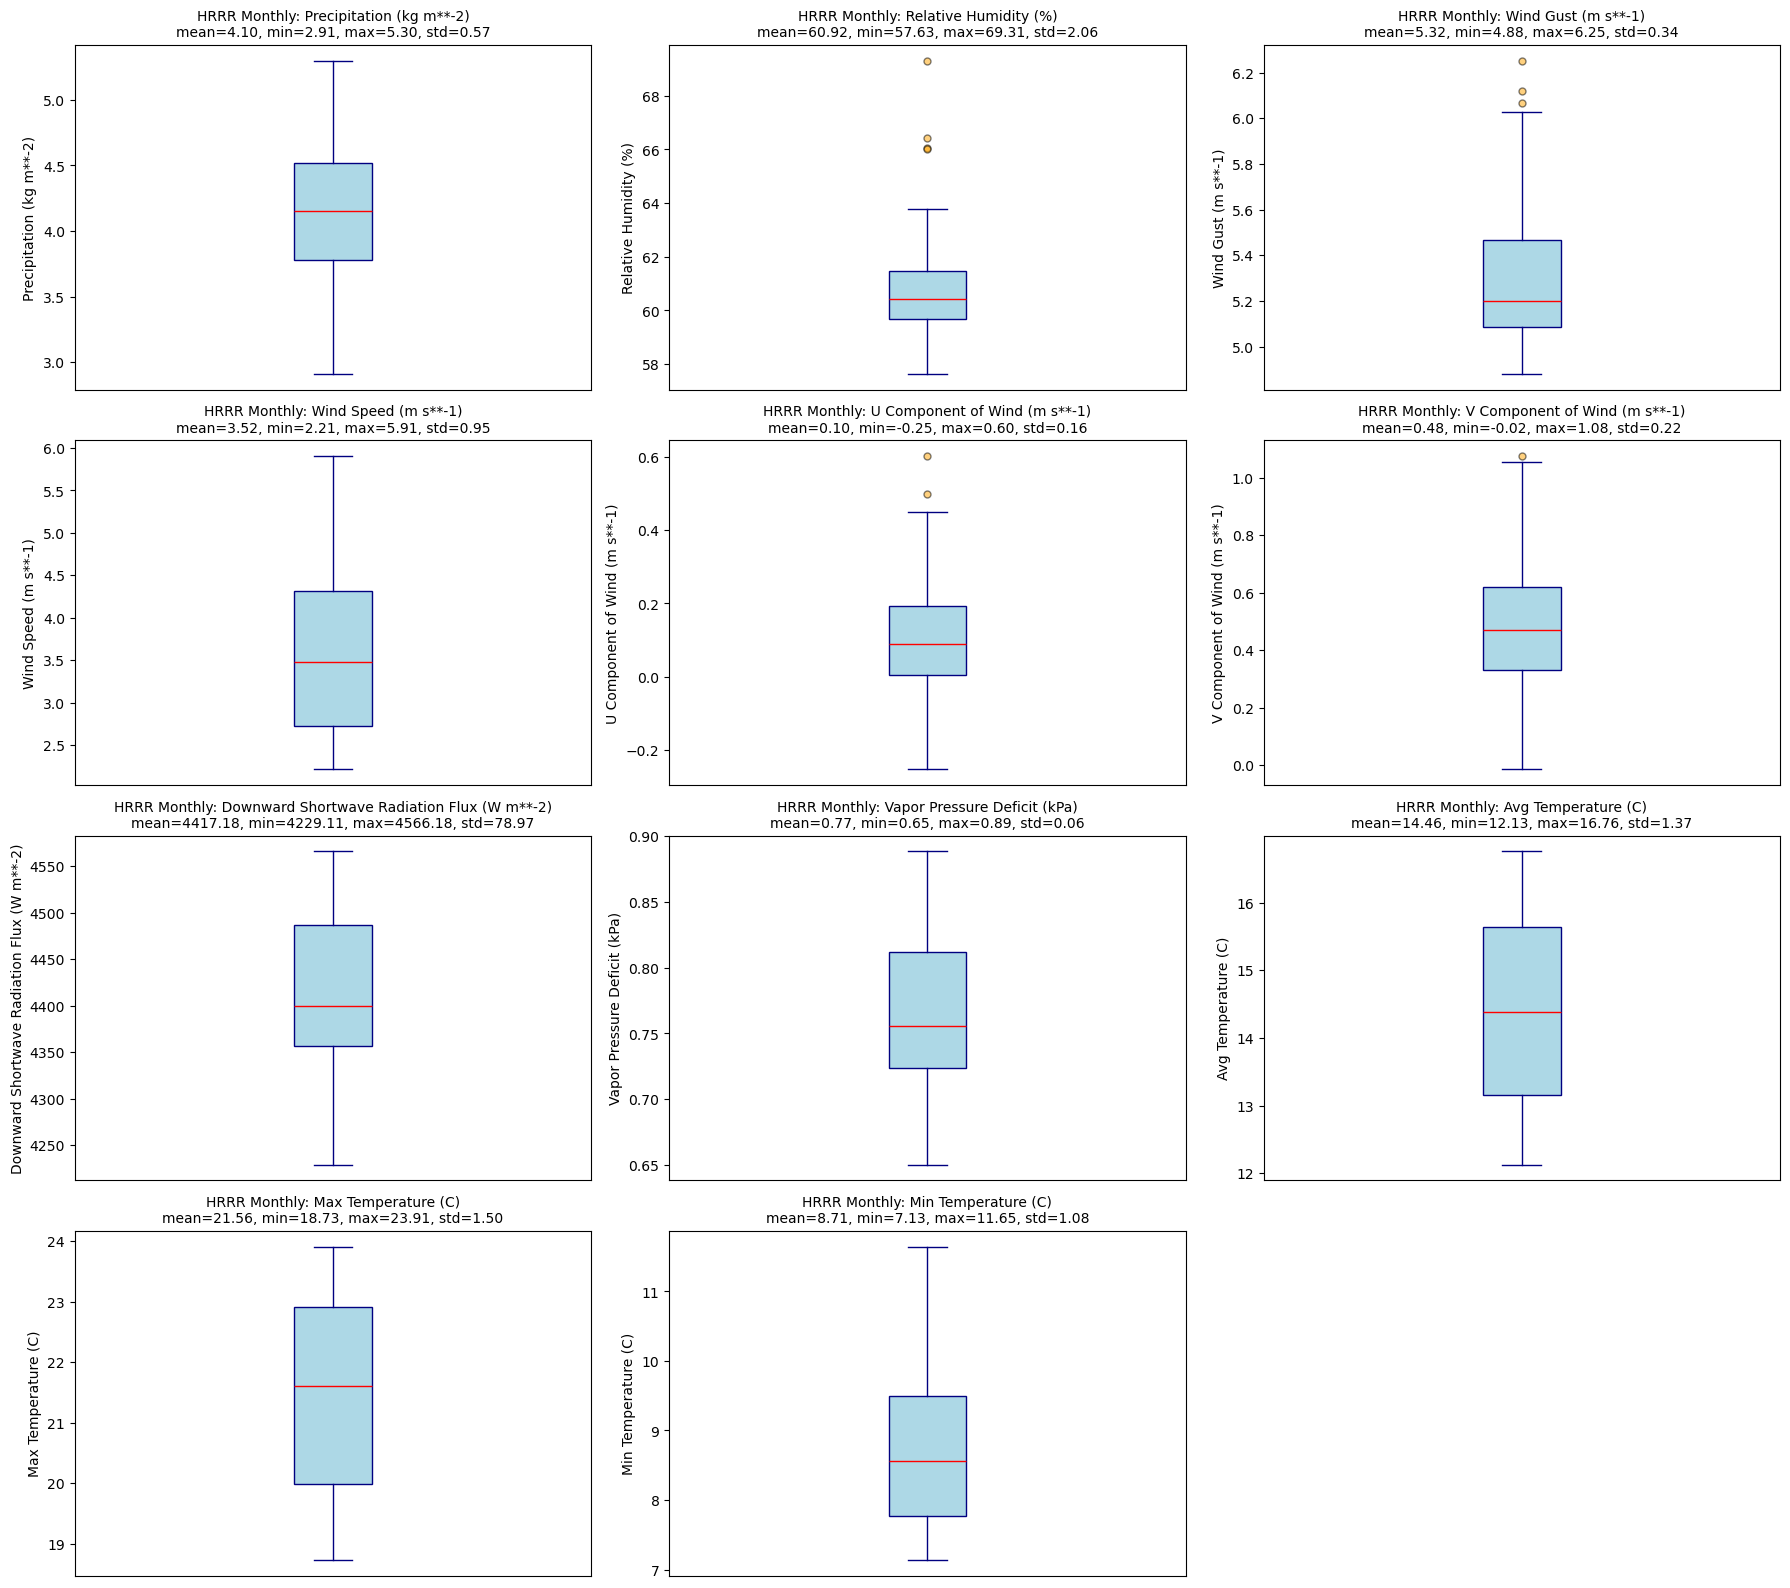

In [146]:
import matplotlib.pyplot as plt
import numpy as np

cols_to_plot = ['Precipitation (kg m**-2)', 'Relative Humidity (%)', 'Wind Gust (m s**-1)', 'Wind Speed (m s**-1)', 'U Component of Wind (m s**-1)', 'V Component of Wind (m s**-1)', 'Downward Shortwave Radiation Flux (W m**-2)', 'Vapor Pressure Deficit (kPa)', 'Avg Temperature (C)', 'Max Temperature (C)', 'Min Temperature (C)']
def plot_boxplots_stats(df, title_prefix):
    n_cols = 3
    n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
    plt.figure(figsize=(n_cols * 6, n_rows * 4))
    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        data = df[col].dropna()
        plt.boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='navy'),
                    medianprops=dict(color='red'),
                    whiskerprops=dict(color='navy'),
                    capprops=dict(color='navy'),
                    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, alpha=0.5))
        stats = f"mean={data.mean():.2f}, min={data.min():.2f}, max={data.max():.2f}, std={data.std():.2f}"
        plt.title(f"{title_prefix}: {col}\n{stats}", fontsize=10)
        plt.ylabel(col)
        plt.xticks([])
    plt.tight_layout()
    plt.show()

plot_boxplots_stats(hrrr_march_df, "HRRR Daily")
plot_boxplots_stats(hrrr_march_monthly_df, "HRRR Monthly")

         Date      County  Grid Index  Max Temperature (C)
0  2022-03-01   COVINGTON         6.0               23.541
1  2022-03-02      BUTLER        12.0               26.615
2  2022-03-03   COVINGTON         6.0               28.122
3  2022-03-04    ESCAMBIA        18.0               29.554
4  2022-03-05      DALLAS         8.0               28.929
5  2022-03-06      DALLAS         8.0               29.684
6  2022-03-07     HOUSTON        10.0               29.176
7  2022-03-08     HOUSTON         8.0               29.765
8  2022-03-09     HOUSTON        10.0               24.590
9  2022-03-10    ESCAMBIA        10.0               24.198
10 2022-03-11     BALDWIN         6.0               25.594
11 2022-03-12      BUTLER         1.0               23.526
12 2022-03-13    ESCAMBIA        18.0               17.126
13 2022-03-14    ESCAMBIA        10.0               22.157
14 2022-03-15      MOBILE         5.0               24.031
15 2022-03-16     HOUSTON        11.0               23.9

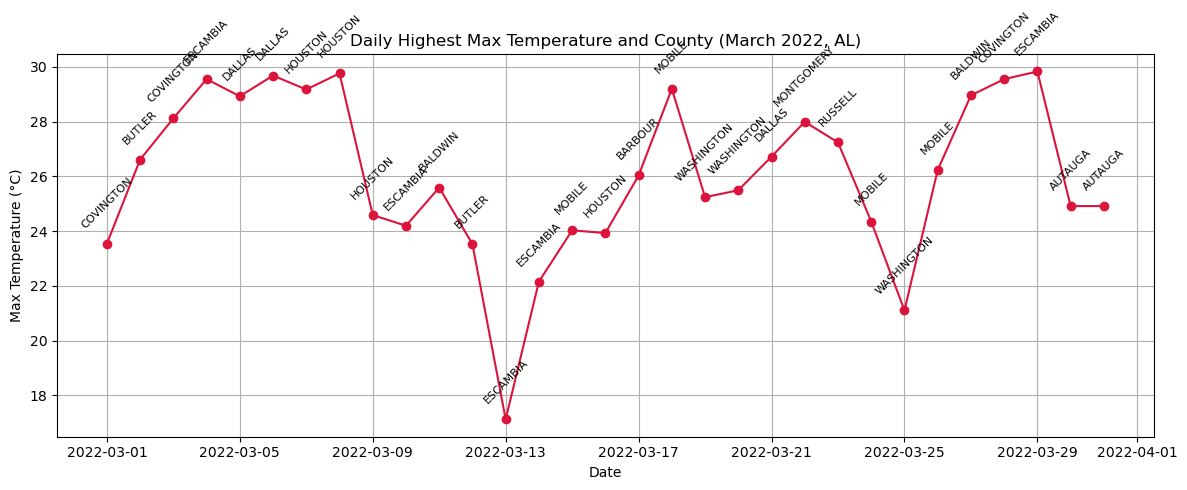

         Date      County  Grid Index  Precipitation (kg m**-2)
0  2022-03-01     AUTAUGA         0.0                     0.000
1  2022-03-02     BALDWIN        24.0                     0.002
2  2022-03-03     BALDWIN        44.0                     0.215
3  2022-03-04     AUTAUGA         0.0                     0.000
4  2022-03-05      MOBILE        20.0                     0.004
5  2022-03-06      MOBILE        34.0                     0.734
6  2022-03-07     CONECUH        22.0                    34.280
7  2022-03-08      WILCOX         7.0                    31.003
8  2022-03-09     BALDWIN        23.0                    54.443
9  2022-03-10     HOUSTON         6.0                     9.389
10 2022-03-11   COVINGTON        10.0                    25.674
11 2022-03-12   ST. CLAIR         7.0                    38.123
12 2022-03-13     AUTAUGA         0.0                     0.000
13 2022-03-14        HALE        16.0                     0.001
14 2022-03-15     HOUSTON         4.0   

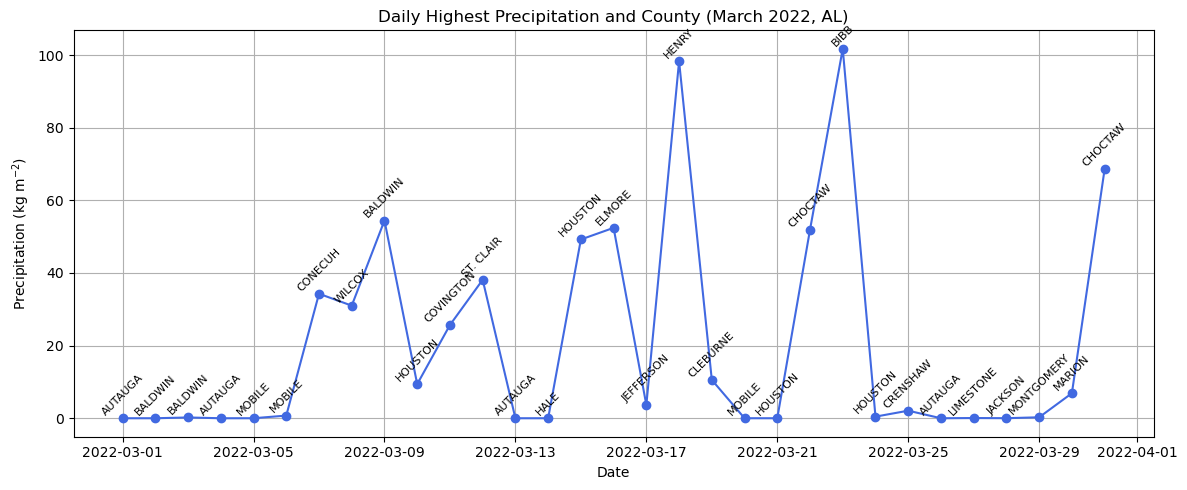

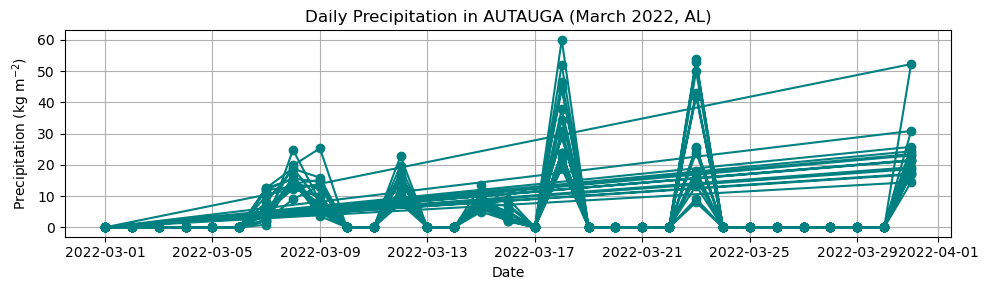

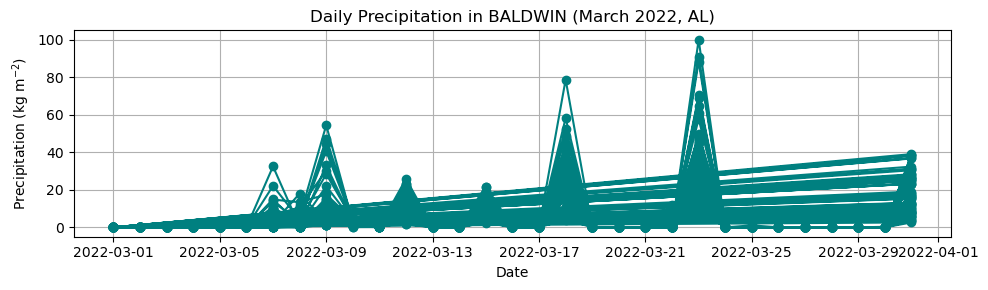

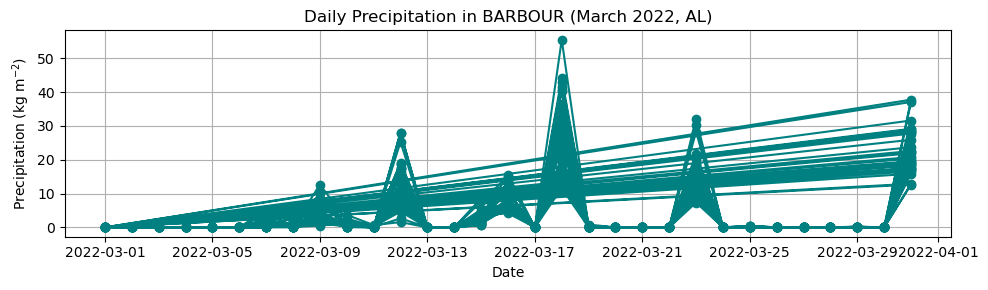

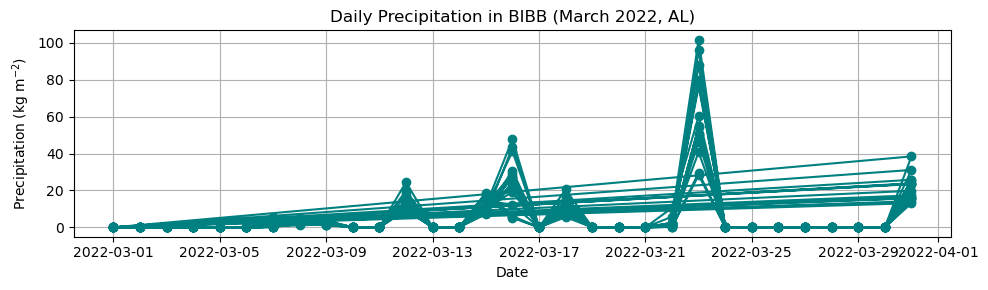

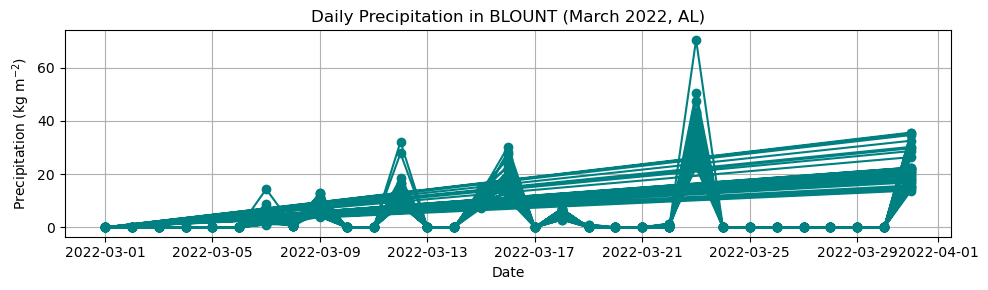

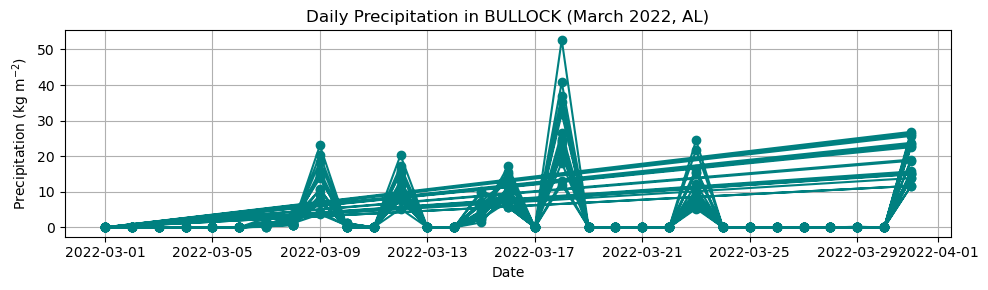

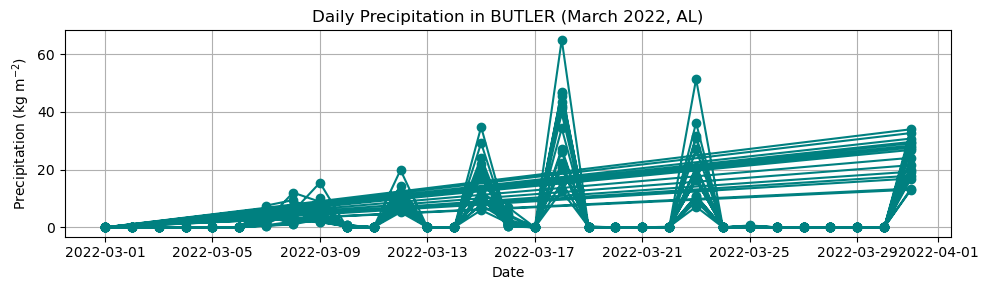

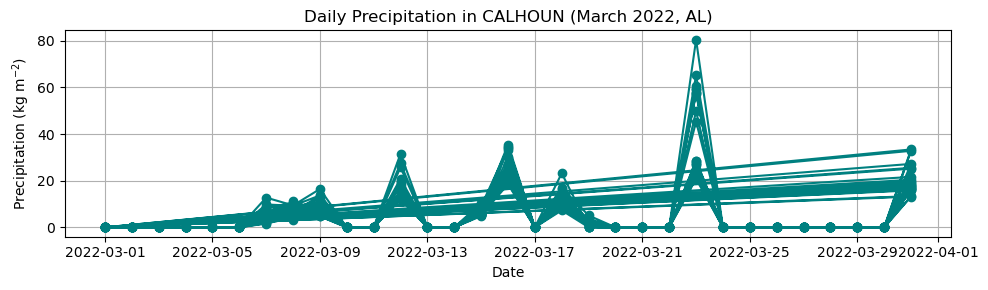

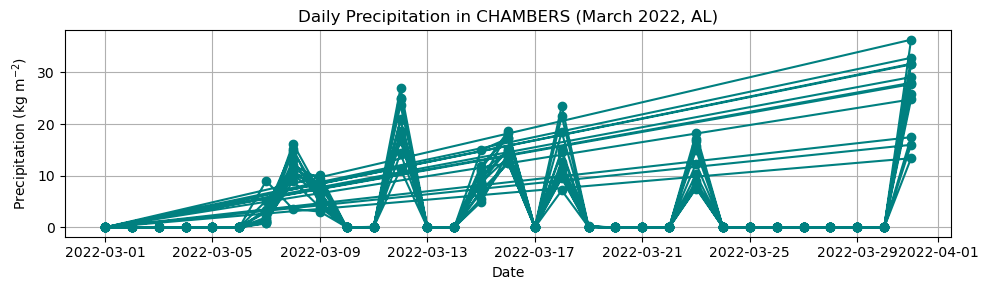

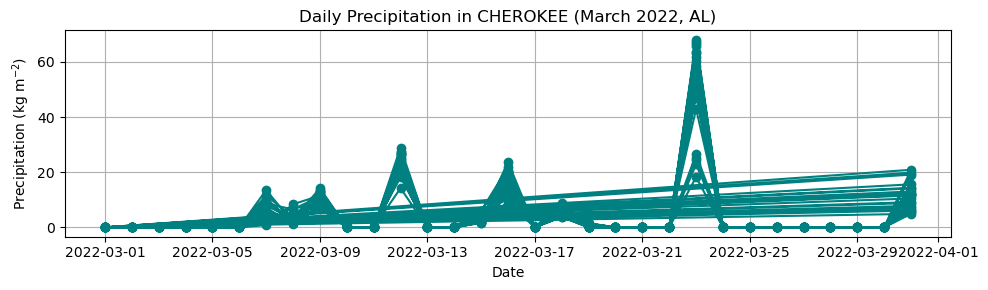

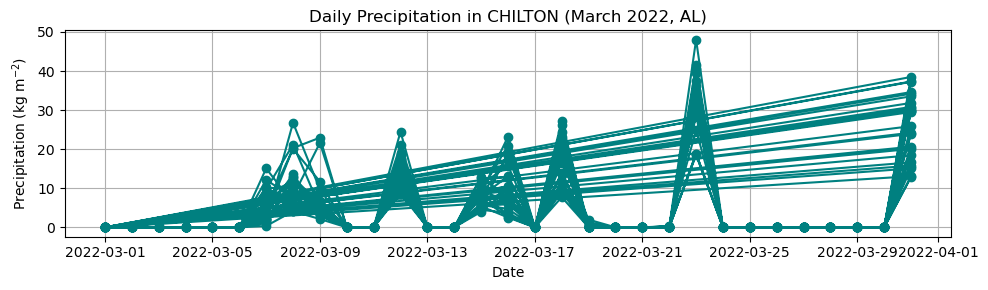

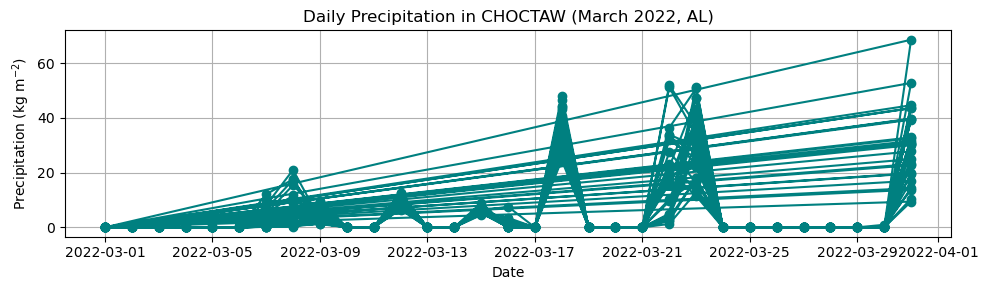

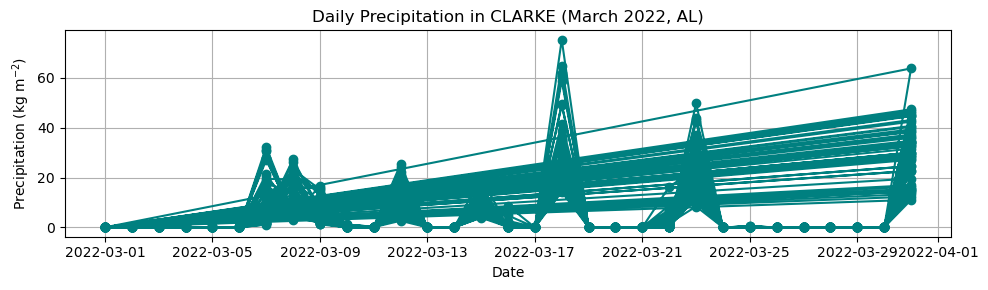

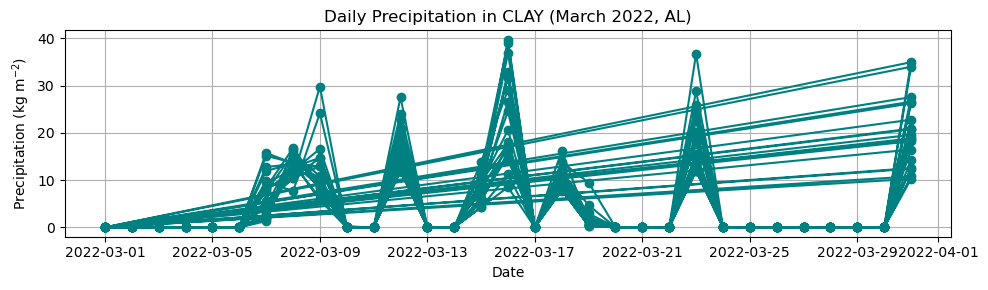

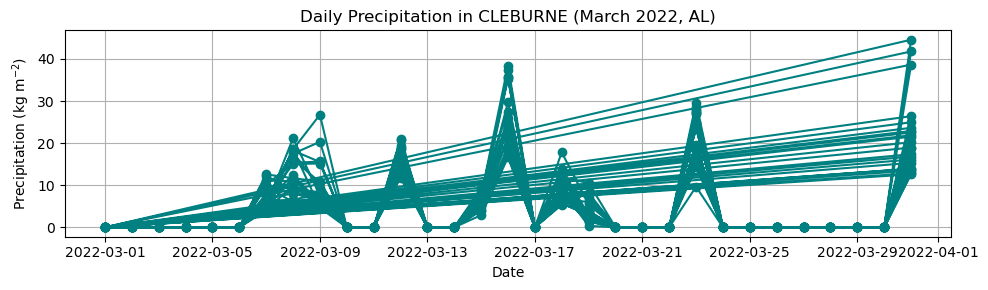

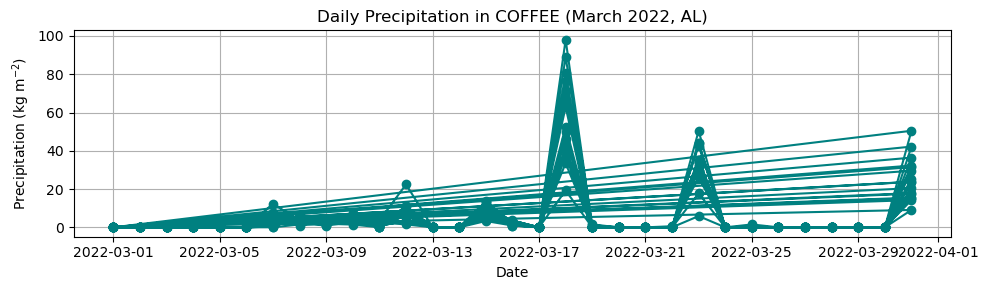

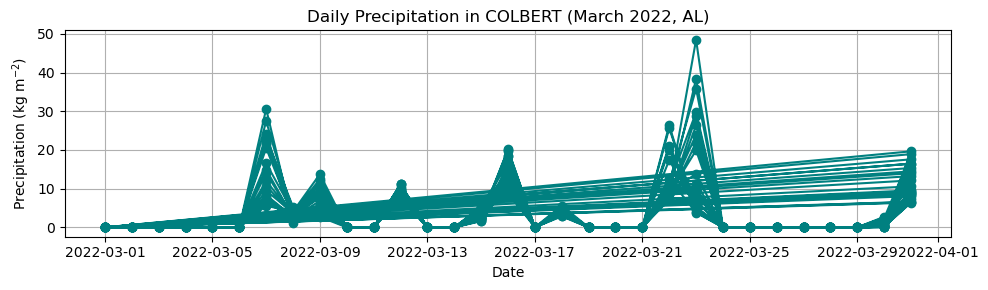

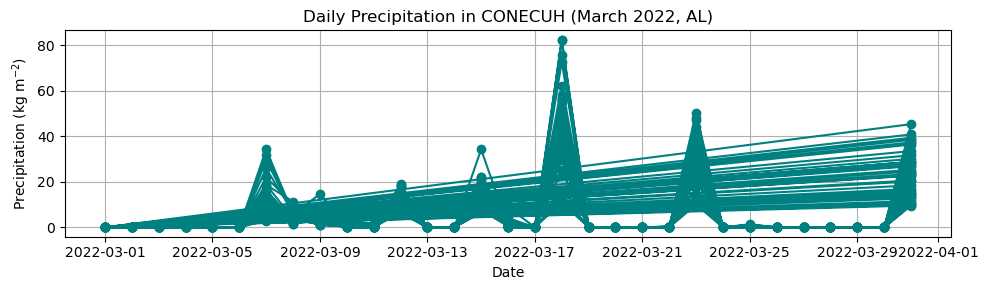

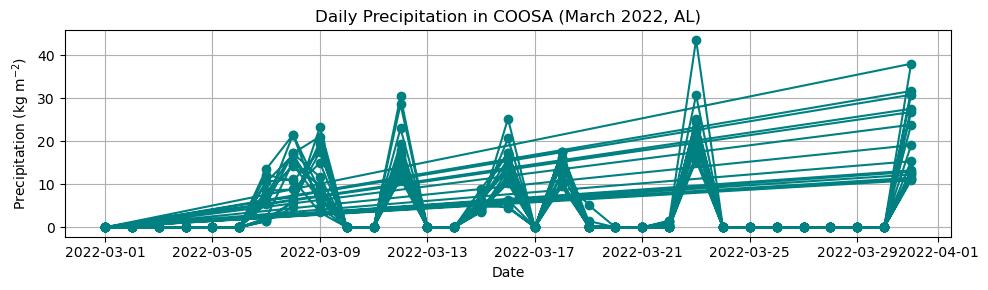

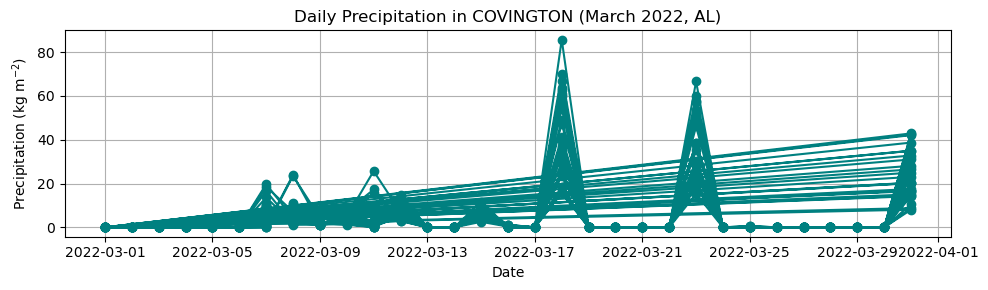

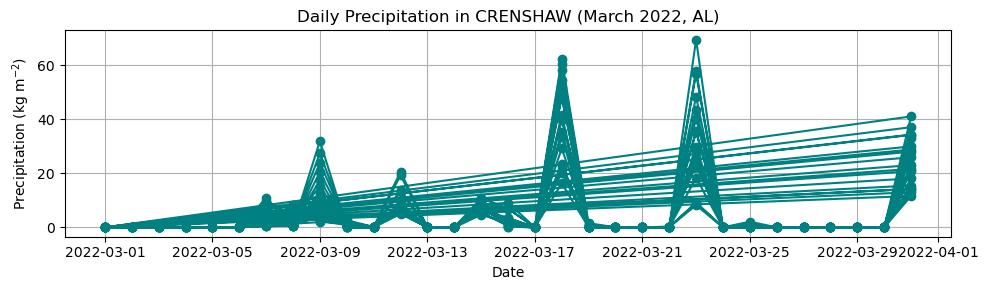

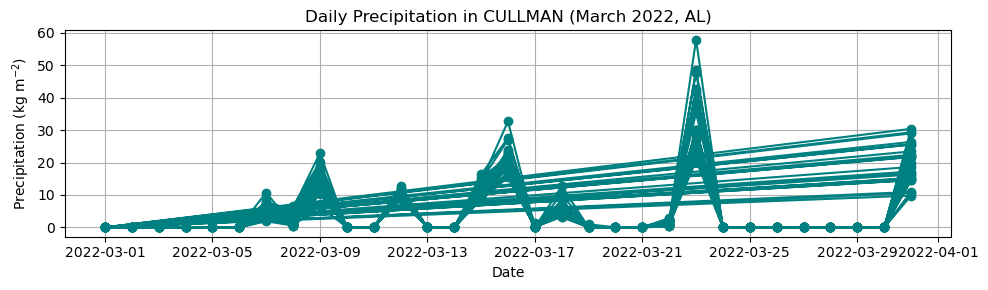

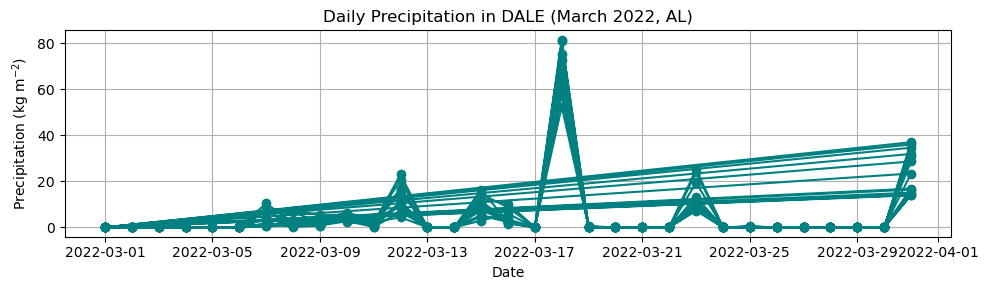

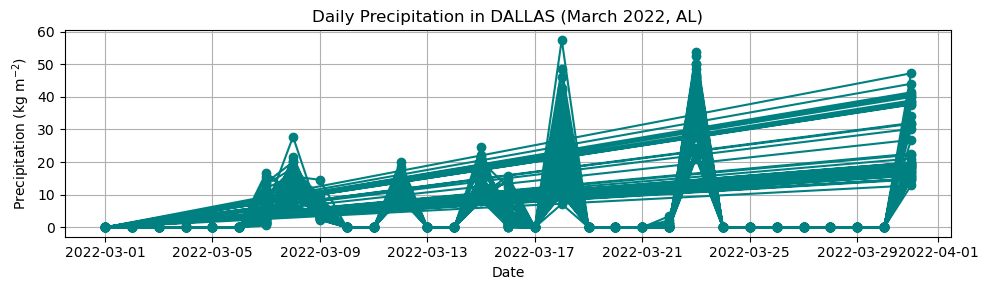

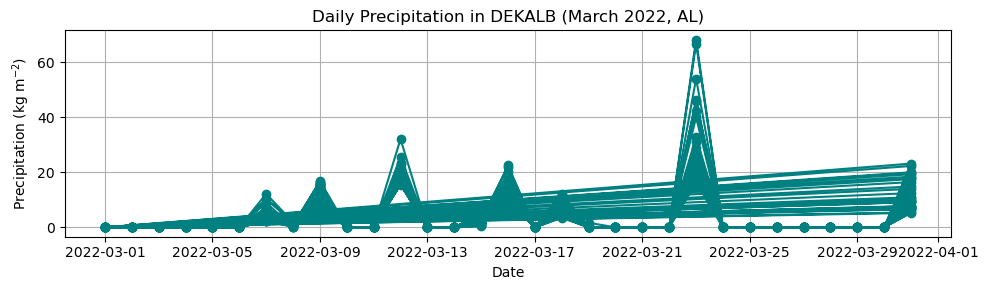

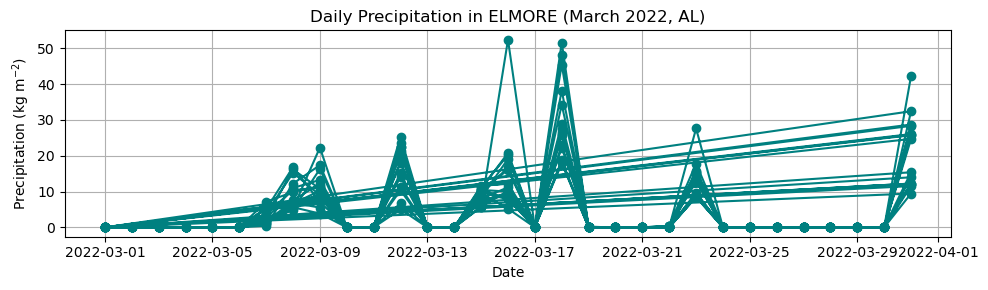

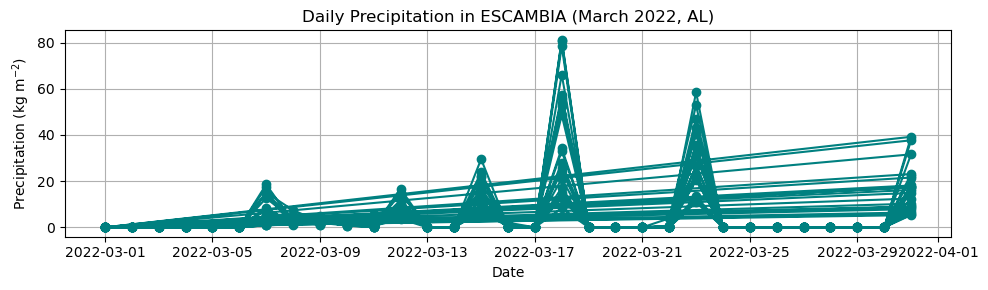

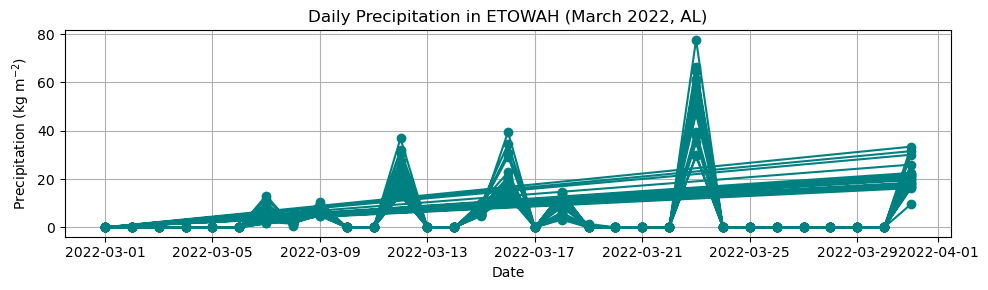

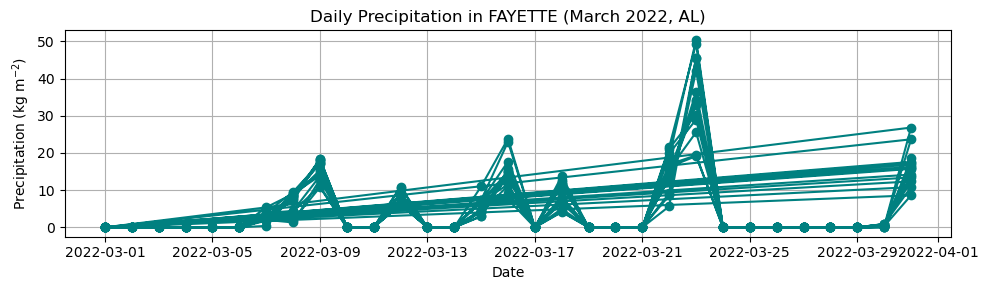

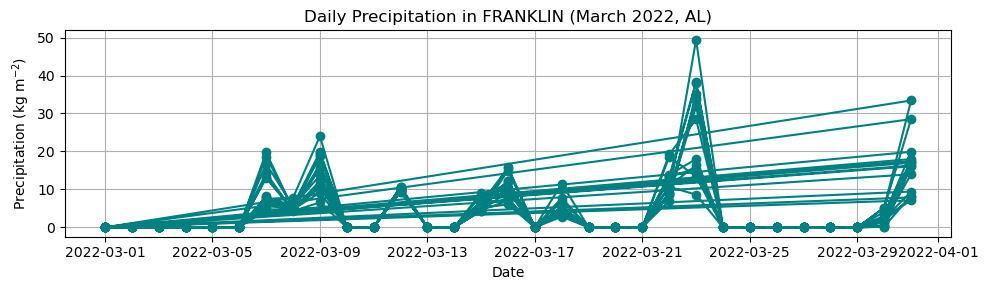

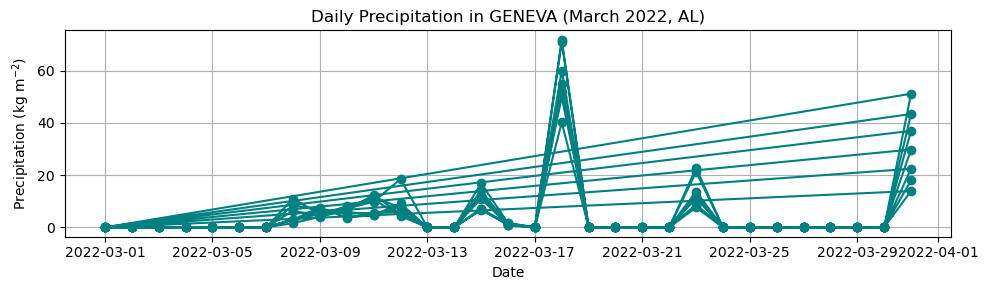

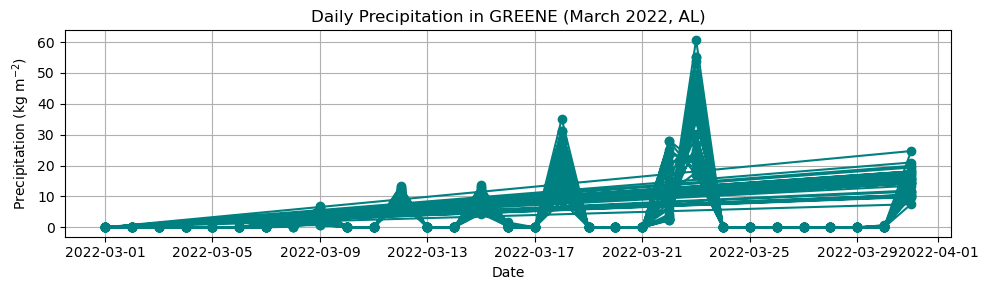

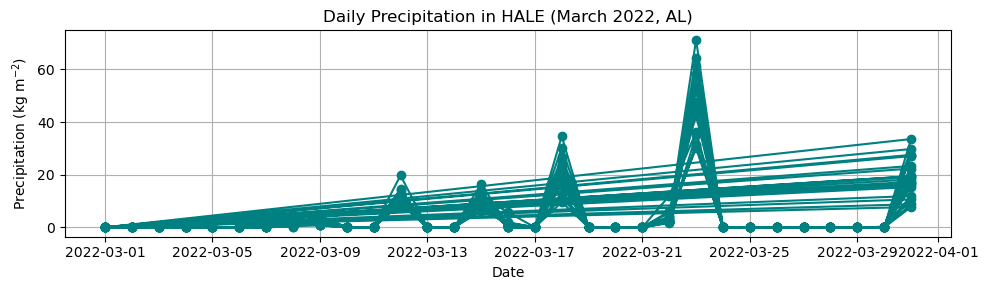

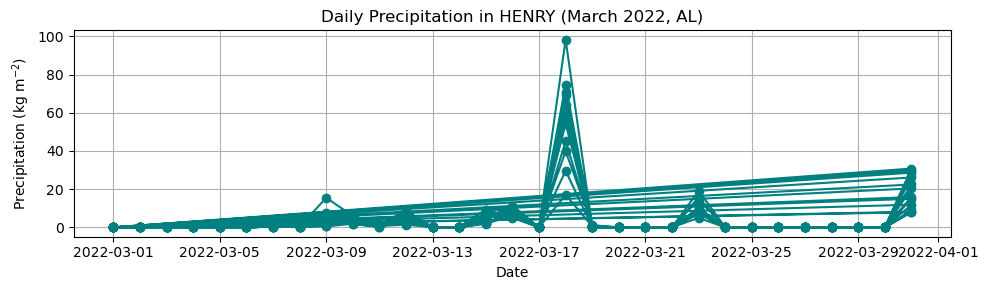

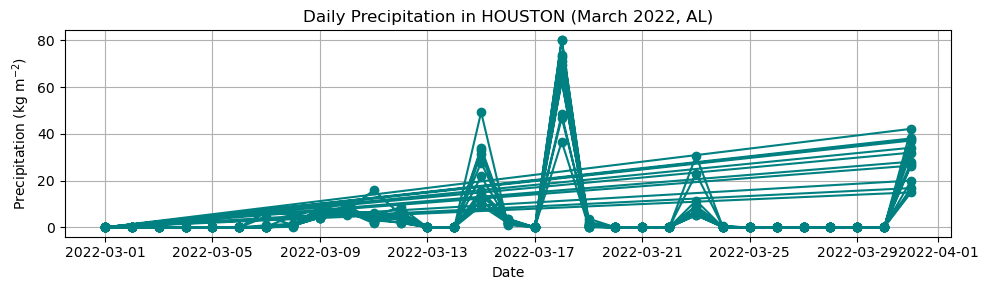

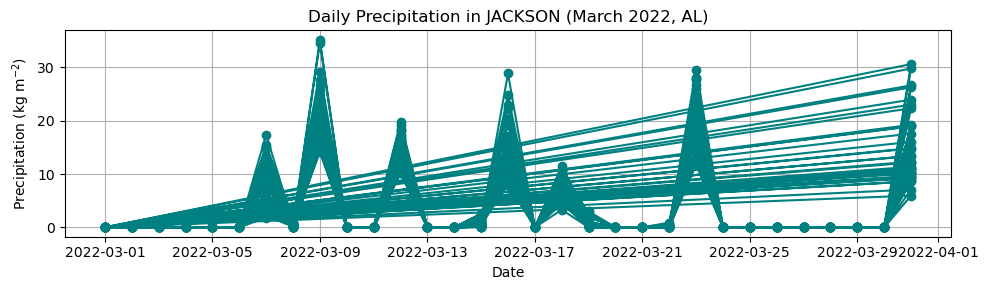

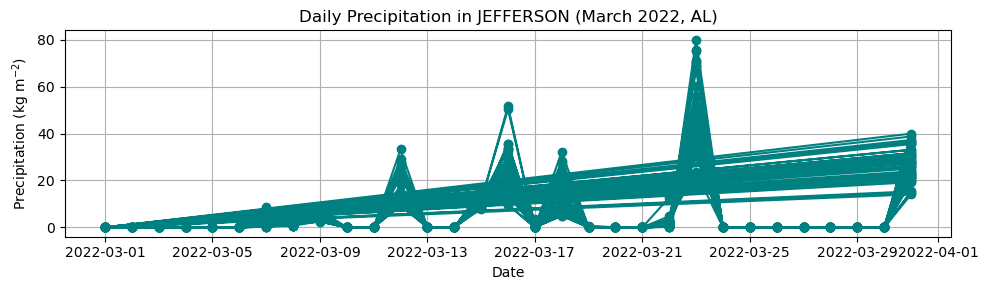

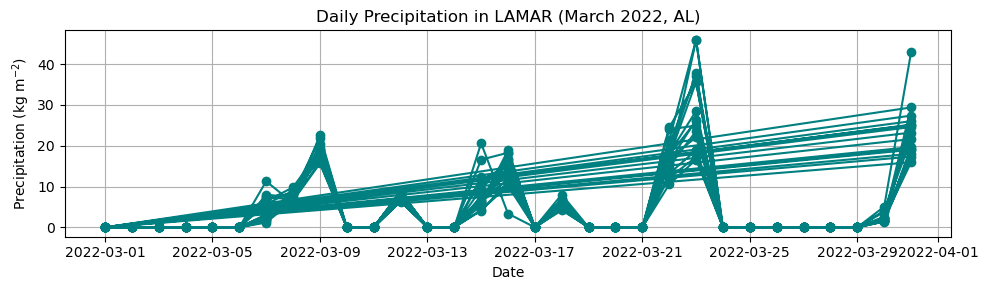

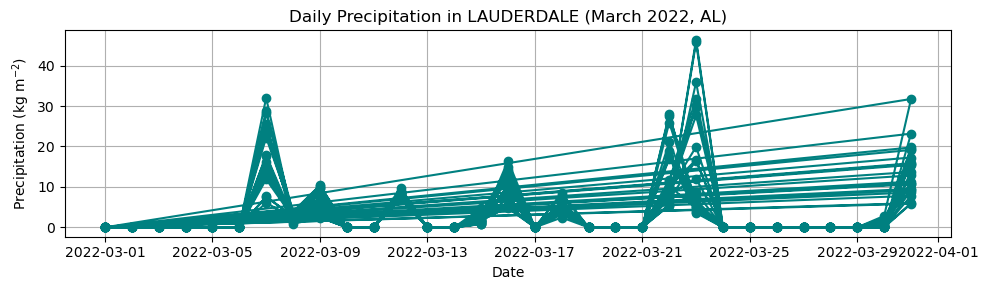

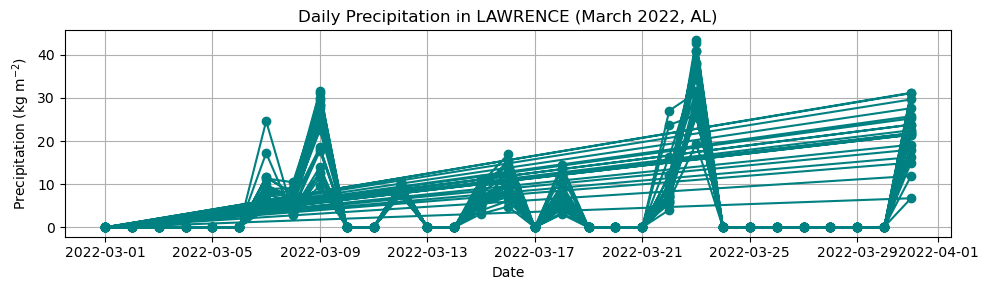

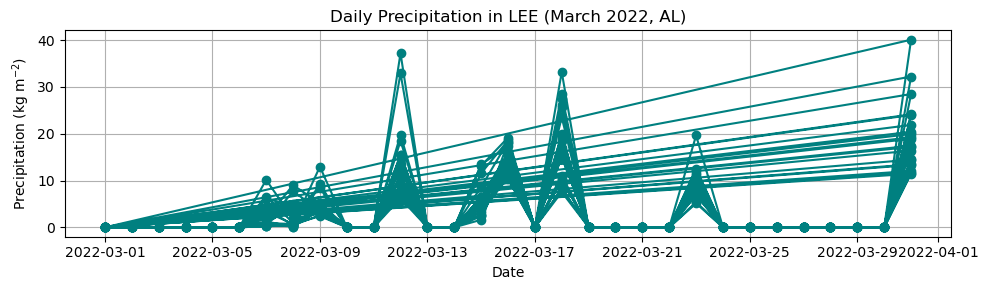

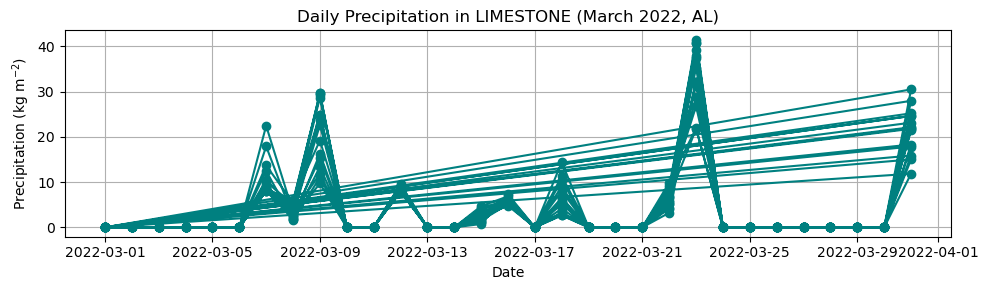

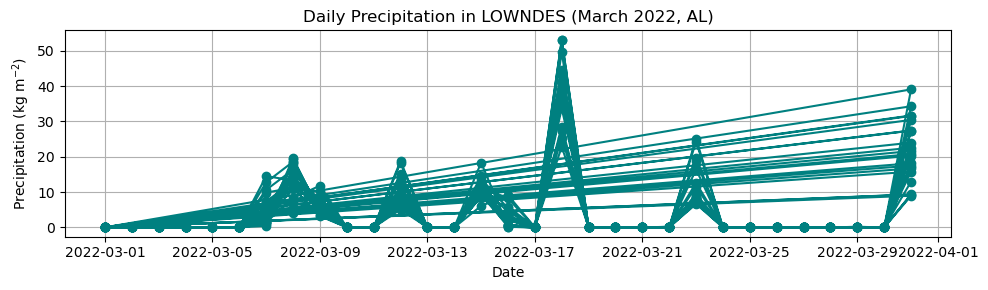

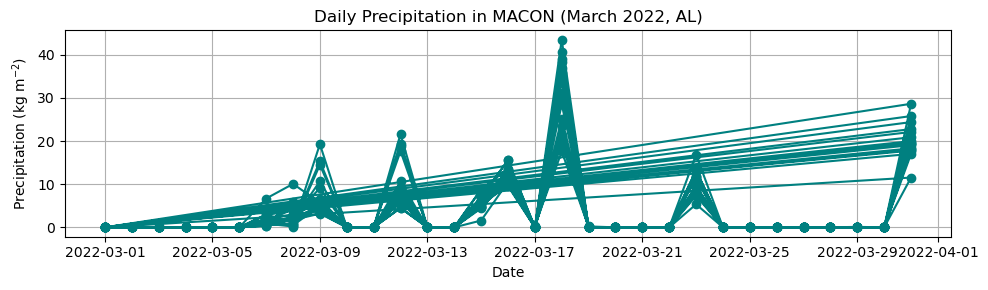

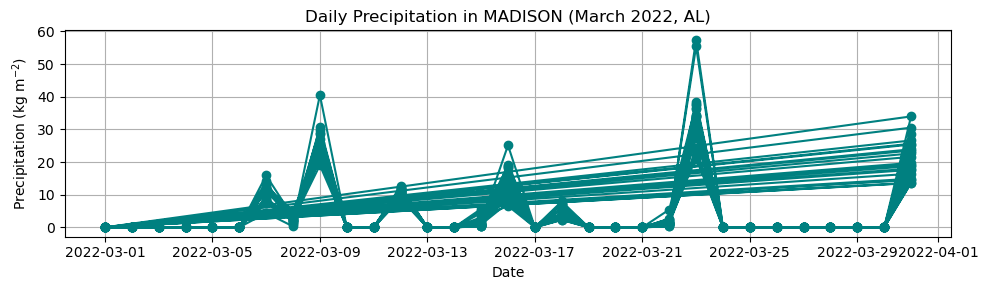

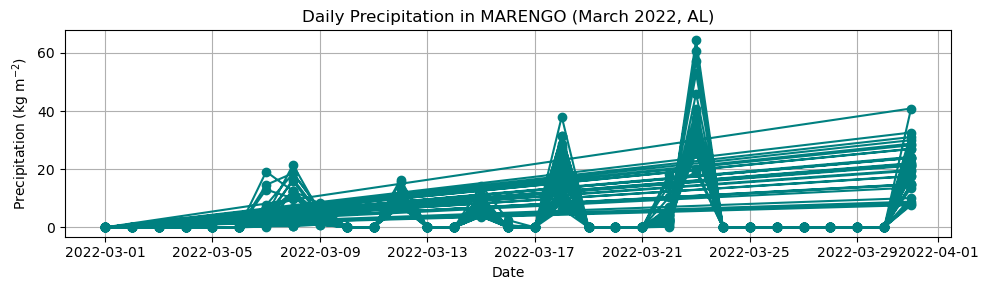

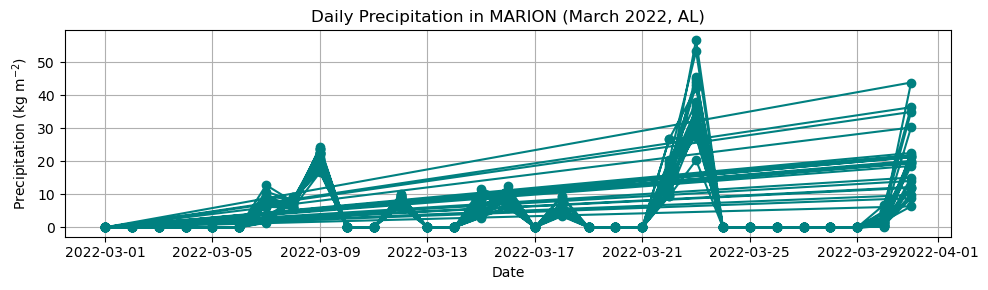

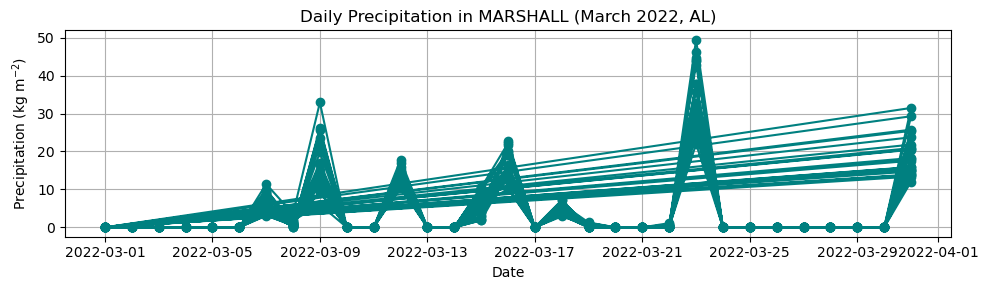

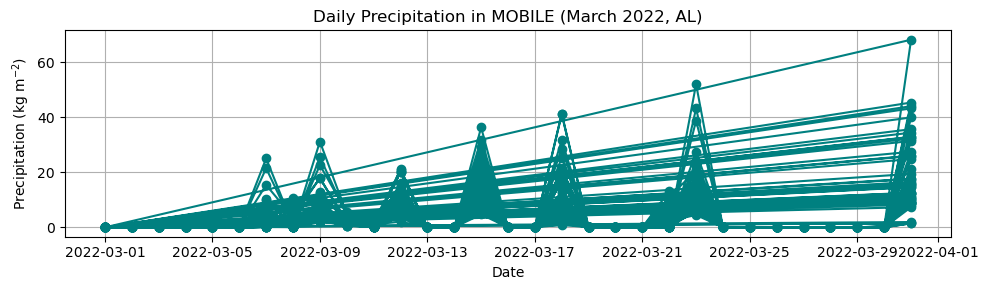

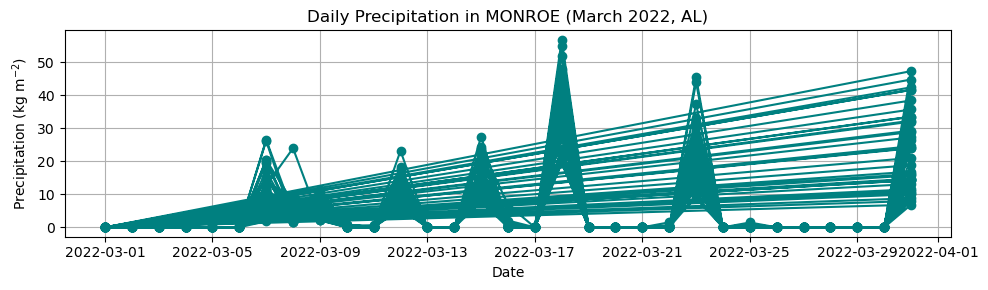

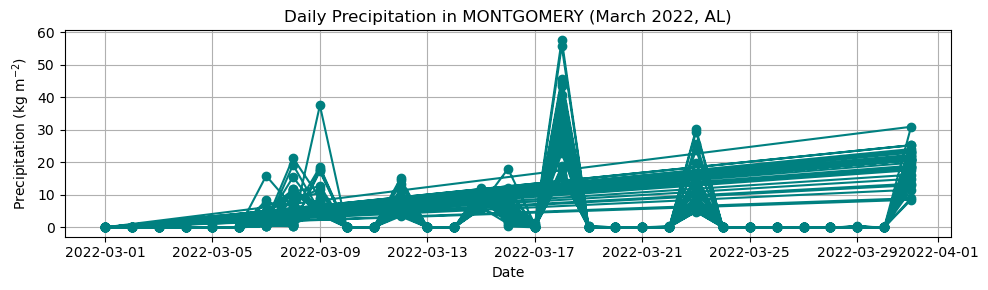

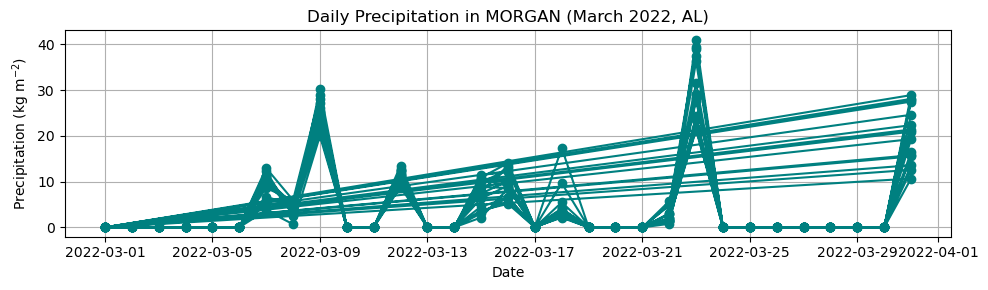

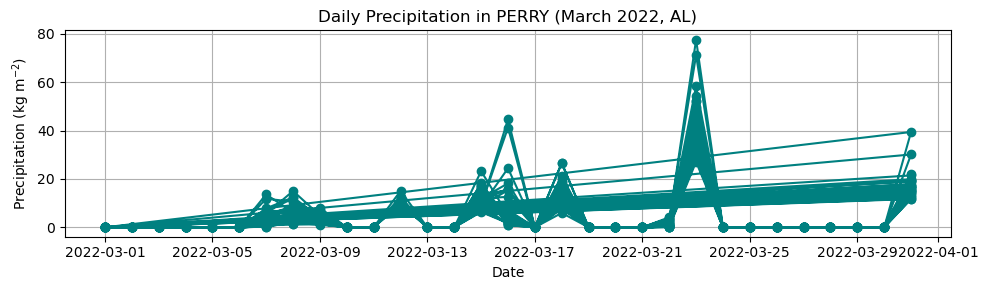

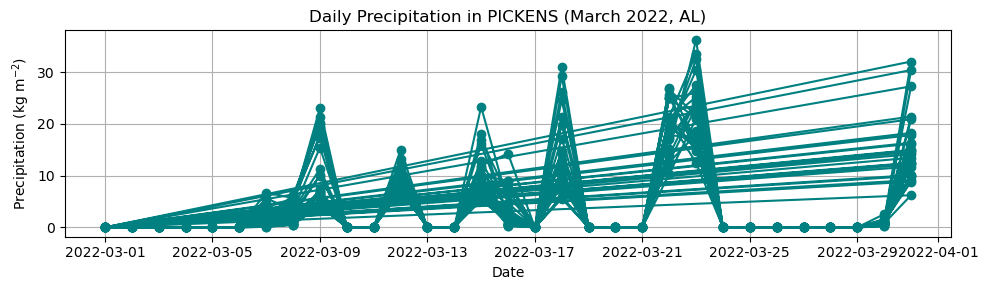

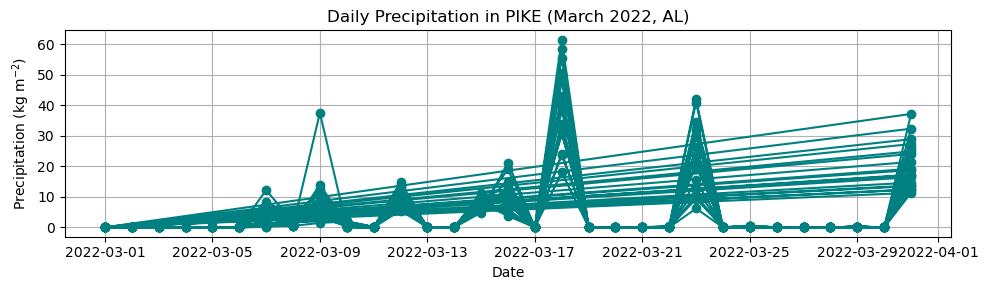

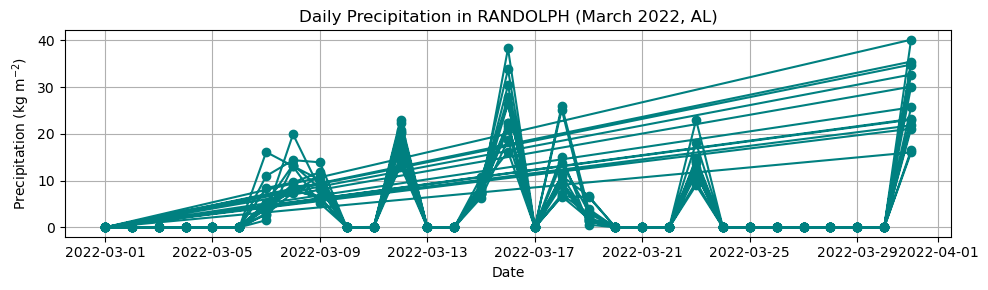

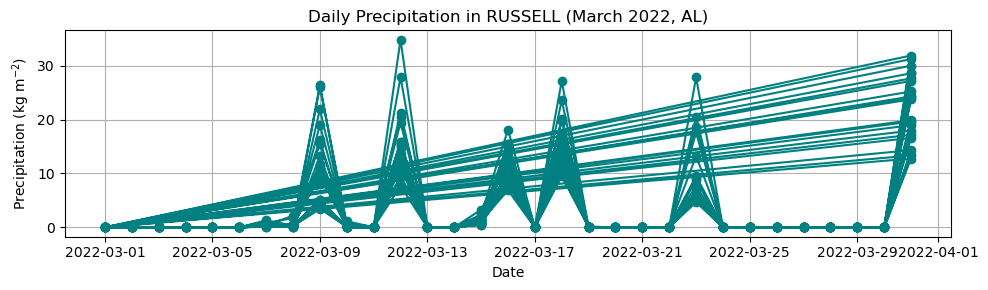

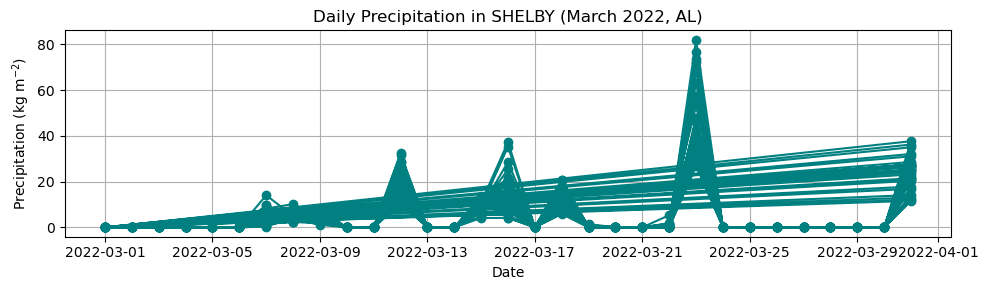

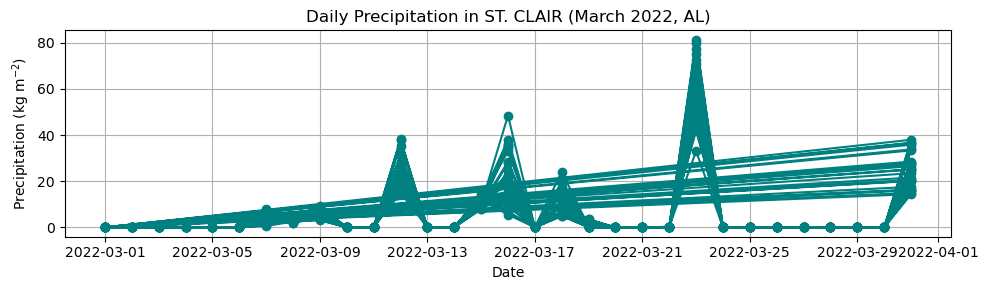

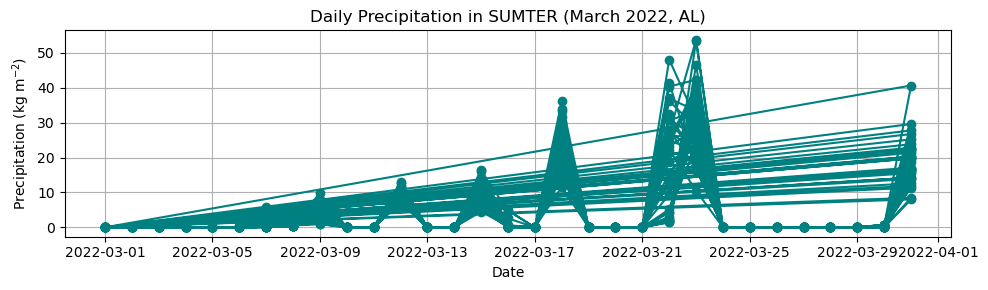

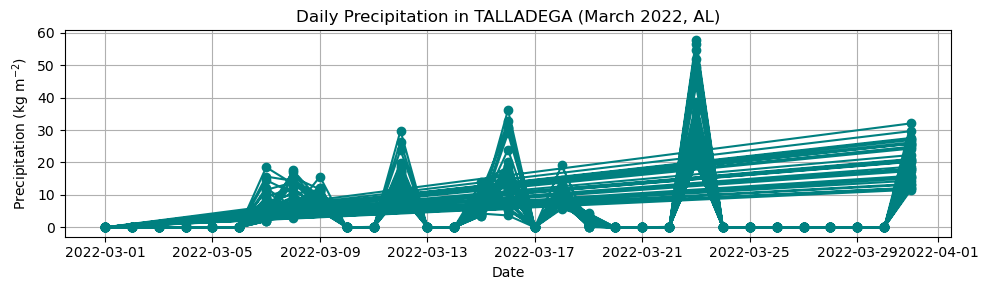

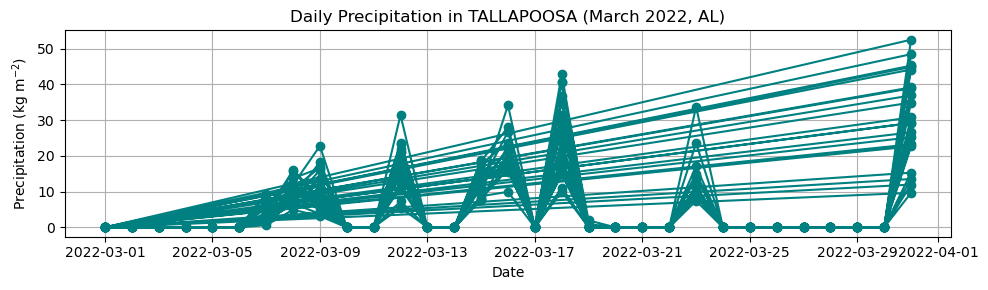

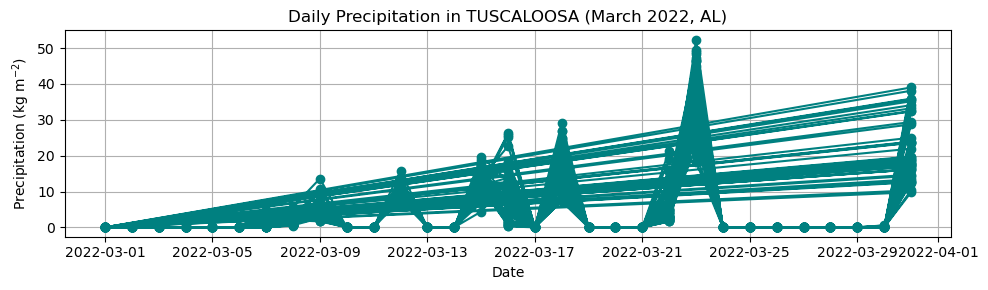

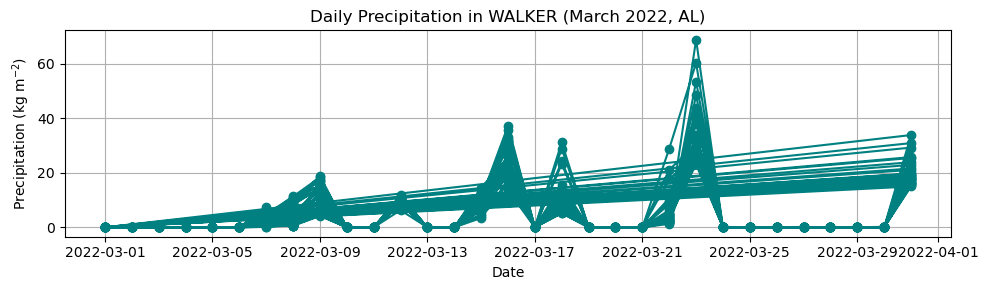

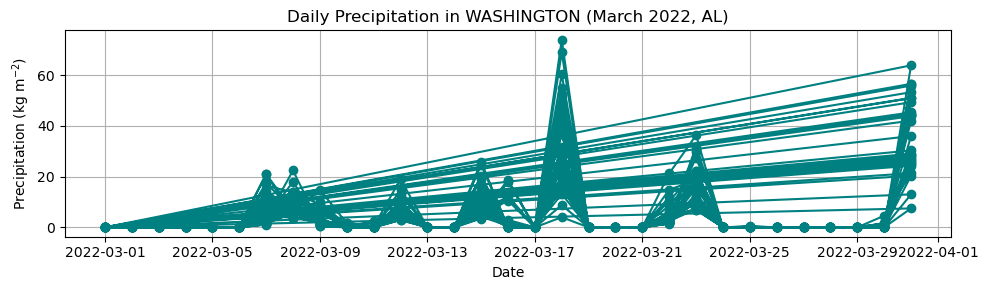

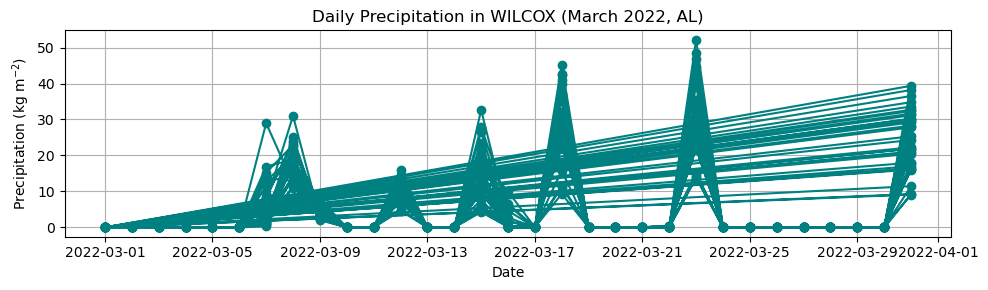

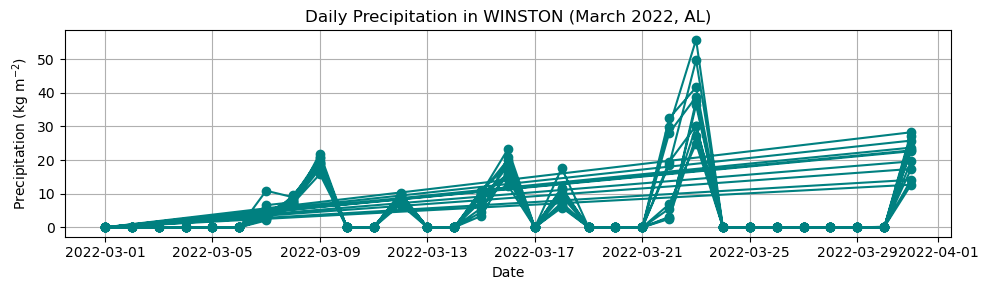

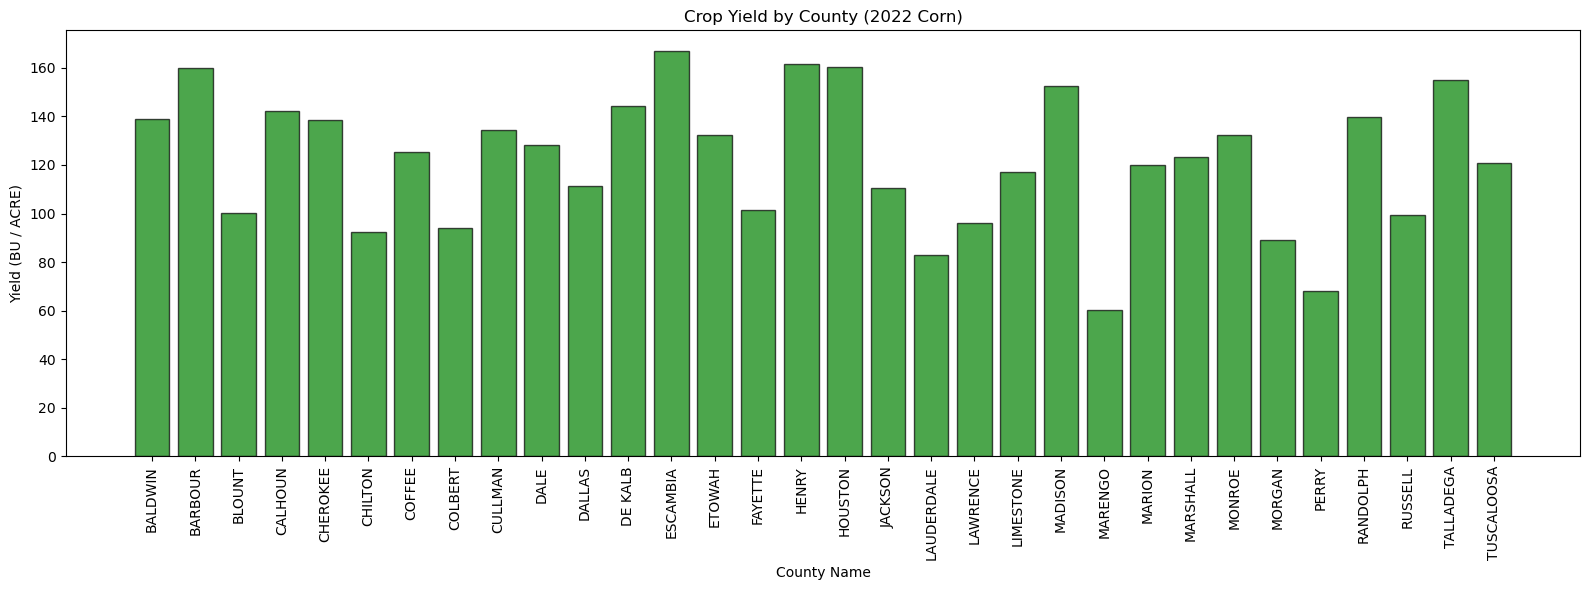

In [147]:

# For each day, find the highest max temperature and the county (and associated grid index) it came from
idx = hrrr_march_df.groupby("Date")["Max Temperature (C)"].idxmax()
daily_max_temp = hrrr_march_df.loc[idx][["Date", "County", "Grid Index", "Max Temperature (C)"]]
daily_max_temp = daily_max_temp.sort_values("Date").reset_index(drop=True)
print(daily_max_temp)

# Line chart: highest max temperature per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_temp["Date"], daily_max_temp["Max Temperature (C)"], marker='o', linestyle='-', color='crimson', label='Max Temp')
for i, row in daily_max_temp.iterrows():
    plt.text(row["Date"], row["Max Temperature (C)"] + 0.5, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Max Temperature and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# For each day, find the highest precipitation and the county (and associated grid index) it came from
idx = hrrr_march_df.groupby("Date")["Precipitation (kg m**-2)"].idxmax()
daily_max_precip = hrrr_march_df.loc[idx][["Date", "County", "Grid Index", "Precipitation (kg m**-2)"]]
daily_max_precip = daily_max_precip.sort_values("Date").reset_index(drop=True)
print(daily_max_precip)

# Line chart: highest precipitation per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_precip["Date"], daily_max_precip["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='royalblue', label='Max Precipitation')
for i, row in daily_max_precip.iterrows():
    plt.text(row["Date"], row["Precipitation (kg m**-2)"] + 0.2, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Precipitation and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Precipitation (kg m$^{-2}$)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 67 graphs: daily precipitation for each county
unique_counties = hrrr_march_df["County"].unique()
for county in unique_counties:
    county_df = hrrr_march_df[hrrr_march_df["County"] == county]
    plt.figure(figsize=(10, 3))
    plt.plot(county_df["Date"], county_df["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='teal')
    plt.title(f"Daily Precipitation in {county} (March 2022, AL)")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (kg m$^{-2}$)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Distribution of crop yield across counties (bar chart)
plt.figure(figsize=(16, 6))
plt.bar(usda_corn_df["county_name"], usda_corn_df["YIELD, MEASURED IN BU / ACRE"], color='green', edgecolor='black', alpha=0.7)
plt.title("Crop Yield by County (2022 Corn)")
plt.xlabel("County Name")
plt.ylabel("Yield (BU / ACRE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()